<a href="https://colab.research.google.com/github/kurasaiteja/Whatsapp-Analysis/blob/master/Whatsapp_Group_Chat_Analysis_for_Android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whatsapp Group Chat Data Analysis using python.

Hey there! This a project which would keep evolving with time.

A typical data science project would involve 5 steps. The first step is Data Collection. In this case Data collection involves

Opening Whatsapp group chat.
Go to Settings.
Click on Export Chat.
Click on without media.

In [1]:
!pip install emoji

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [ ]:
! git clone https://github.com/amueller/word_cloud.git
%cd word_cloud
! pip install .

# **Data Preparation:**


This plain text file will have to be parsed and tokenized in a meaningful manner in order to be served (stored) in a Pandas dataframe.

Let us consider just a single line from the text (which we will call “raw text”) and see how we can extract relevant columns from it:

18/06/17, 9:47 PM - Teja: Why do you have 2 numbers?

In our sample line of text, our main objective is to automatically break down the raw message into 4 tokens.

{Date}, {Time} - {Author}: {Message}

{18/06/17}, {9:47 PM} - {Teja}: {Why do you have 2 numbers?}






In [57]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [58]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')

True

In [59]:
# def FindAuthor(s):
#     patterns = [
#         '([\w]+):',                        # First Name
#         '([\w]+[\s]+[\w]+):',              # First Name + Last Name
#         '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
#         '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
#         '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
#         '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
#     ]
#     pattern = '^' + '|'.join(patterns)
#     result = re.match(pattern, s)
#     if result:
#         return True
#     return False

In [60]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [61]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [62]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'content/SahecoClassof1981.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [63]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [64]:
df.head(2)

Date   Time               Author  \
0        NaT   None                 None   
1 2018-09-24  22:18  Didier Forbi Melone   

                                             Message  
0   Chrispine Mwale 25 a student studying Civil e...  
1                                                🤣🤣🤣

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     39997 non-null  datetime64[ns]
 1   Time     39997 non-null  object        
 2   Author   38181 non-null  object        
 3   Message  39998 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


## Printing Participants

In [16]:
df.Author.unique()

array([None, 'Didier Forbi Melone', 'FChe', 'Aloysius Chi', 'Adrian Wara',
       'Osric Navti', 'Ernest Tonka', 'Tamasang (Boy)', 'George Che',
       'John Fonta', 'Cletus Fonyam', 'Germanus Bah', '+237 51130708',
       'Gabriel Asongwe', 'Louis Kiru', 'Damian Anong', 'Bob Chi Neba',
       "Pascal K'kongson", 'Bedes', '+237 75079262', '+237 79369186',
       'Awenti Valentine', 'Ben Sona', 'Leyland Elange',
       'Fidelis Ateghang', 'Kaba Kristen Nubia', 'Floribert Kangkolo',
       'Ndukum Julius', 'Magnus Mutah Che', 'Kingsley Wara',
       'Innocent Bobga', 'Boniface Nasah', 'Valentine Seghanka',
       'Marinus Yong', 'Terence Ndiagang', 'Chris Boyo',
       'Jean Pascal Law', '+1 (301) 437-6591', 'Edwin Chilla',
       'Michael Che', 'Joseph Allomba', 'Awah Edward', 'Jude Mbih',
       'Achidi Julius Ndangi', 'Erico Ngante', 'Emmanuel Nkwenti',
       'Eric Ndangoh', 'Eric Limen', 'Thescribe Emeka Nzeribe',
       'Nico Ngwa', '+237 75412226', '+1 (202) 956-8428',
       'Toc

**None** which is the first element in array indicates few messages which do not have authors like,


*   Group was created.
*   Teja was added and so on.



Let us remove the messages created by None

In [17]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38181 entries, 1 to 39997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     38181 non-null  datetime64[ns]
 1   Time     38181 non-null  object        
 2   Author   38181 non-null  object        
 3   Message  38181 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


In [18]:
df.Author.unique()

array(['Didier Forbi Melone', 'FChe', 'Aloysius Chi', 'Adrian Wara',
       'Osric Navti', 'Ernest Tonka', 'Tamasang (Boy)', 'George Che',
       'John Fonta', 'Cletus Fonyam', 'Germanus Bah', '+237 51130708',
       'Gabriel Asongwe', 'Louis Kiru', 'Damian Anong', 'Bob Chi Neba',
       "Pascal K'kongson", 'Bedes', '+237 75079262', '+237 79369186',
       'Awenti Valentine', 'Ben Sona', 'Leyland Elange',
       'Fidelis Ateghang', 'Kaba Kristen Nubia', 'Floribert Kangkolo',
       'Ndukum Julius', 'Magnus Mutah Che', 'Kingsley Wara',
       'Innocent Bobga', 'Boniface Nasah', 'Valentine Seghanka',
       'Marinus Yong', 'Terence Ndiagang', 'Chris Boyo',
       'Jean Pascal Law', '+1 (301) 437-6591', 'Edwin Chilla',
       'Michael Che', 'Joseph Allomba', 'Awah Edward', 'Jude Mbih',
       'Achidi Julius Ndangi', 'Erico Ngante', 'Emmanuel Nkwenti',
       'Eric Ndangoh', 'Eric Limen', 'Thescribe Emeka Nzeribe',
       'Nico Ngwa', '+237 75412226', '+1 (202) 956-8428',
       'Tochukwu 

We successfully removed None author.

# Group Wise Stats.

In [19]:
total_messages = df.shape[0]
print(total_messages)

38181


Let us now find out the total Media Messages

In [20]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

8232


In [21]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [22]:
emojis = sum(df['emoji'].str.len())
print(emojis)

17953


In [23]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()


In [24]:
links = np.sum(df.urlcount)

In [25]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 38181
Media: 8232
Emojis: 17953
Links: 612


## Let us Separate the media messages and text messages

In [26]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [27]:
messages_df = df.drop(media_messages_df.index)

In [28]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 1 to 39997
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      29949 non-null  datetime64[ns]
 1   Time      29949 non-null  object        
 2   Author    29949 non-null  object        
 3   Message   29949 non-null  object        
 4   emoji     29949 non-null  object        
 5   urlcount  29949 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ MB


It might be interesting to count the number of letters and words used by each author in each message. So, let us add 2 new columns to the data frame called “Letter_Count” and “Word_Count”, using the following code:

In [29]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [30]:
messages_df.head(2)

Date   Time               Author  \
1 2018-09-24  22:18  Didier Forbi Melone   
3 2018-09-24  22:37                 FChe   

                                             Message      emoji  urlcount  \
1                                                🤣🤣🤣  [🤣, 🤣, 🤣]         0   
3  Nothing can ever come close to a good Kassav t...        [🙂]         0   

   Letter_Count  Word_Count  MessageCount  
1             3           1             1  
3           149          32             1

In [31]:
messages_df["emojicount"]= df['emoji'].str.len()

#Author wise stats

In [103]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message {:.2f}'.format(words_per_message))
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Didier Forbi Melone -
Messages Sent 2725
Words per message 20.44
Media Messages Sent 349
Emojis Sent 1979
Links Sent 3

Stats of FChe -
Messages Sent 1427
Words per message 26.32
Media Messages Sent 255
Emojis Sent 1966
Links Sent 65

Stats of Aloysius Chi -
Messages Sent 1226
Words per message 29.02
Media Messages Sent 208
Emojis Sent 47
Links Sent 5

Stats of Adrian Wara -
Messages Sent 1612
Words per message 12.20
Media Messages Sent 151
Emojis Sent 1513
Links Sent 1

Stats of Osric Navti -
Messages Sent 1018
Words per message 20.11
Media Messages Sent 318
Emojis Sent 183
Links Sent 58

Stats of Ernest Tonka -
Messages Sent 870
Words per message 24.36
Media Messages Sent 259
Emojis Sent 809
Links Sent 13

Stats of Tamasang (Boy) -
Messages Sent 528
Words per message 50.44
Media Messages Sent 329
Emojis Sent 398
Links Sent 5

Stats of George Che -
Messages Sent 1367
Words per message 125.54
Media Messages Sent 743
Emojis Sent 991
Links Sent 37

Stats of John Fonta -
Messages

In [134]:
# Creates a list of top unique Authors - ['Manikanta', 'Teja Kura', .........]
top_auth = messages_df.groupby("Author").sum().sort_values(by='MessageCount', ascending=False)[:10]
top_auth.reset_index(inplace=True)

l = top_auth.Author.unique()
data_types = {'Messages Sent': np.int64, \
                  'Words per message': np.float, \
                  'Media Messages Sent': np.int64, \
                  'Emojis Sent': np.int64, \
                  'Links Sent': np.int64}
auth_stats = pd.DataFrame(index=['Messages Sent', 'Words per message', 'Media Messages Sent', \
                                 'Emojis Sent', 'Links Sent'],
                          data=None)
for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    # req_df will contain messages of only one particular user
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    emojis = sum(req_df['emoji'].str.len())
    links = sum(req_df["urlcount"])
    auth_stat = pd.Series({'Messages Sent': req_df.shape[0], \
                  'Words per message': words_per_message, \
                  'Media Messages Sent': media, \
                  'Emojis Sent': emojis, \
                  'Links Sent': links
                 }, name=l[i])
    
    auth_stats[l[i]] = auth_stat
    auth_stats[l[i]] = auth_stats[l[i]].astype(np.int64)
print(f'Author Stats -')
auth_stats

Author Stats -


Bedes  Didier Forbi Melone  Louis Kiru  Adrian Wara  \
Messages Sent         3304                 2725        1792         1612   
Words per message       42                   20          12           12   
Media Messages Sent    337                  349         251          151   
Emojis Sent           1274                 1979         139         1513   
Links Sent              52                    3          25            1   

                     FChe  Gabriel Asongwe  George Che  John Fonta  \
Messages Sent        1427             1402        1367        1246   
Words per message      26               53         125          20   
Media Messages Sent   255             1390         743         579   
Emojis Sent          1966              886         991        2397   
Links Sent             65               26          37           9   

                     Aloysius Chi  Attoh Mucha  
Messages Sent                1226         1125  
Words per message              29           21  
Media Messages Sent           208          201  
Emojis Sent                    47          992  
Links Sent                      5           31

In [140]:
auth_stats.iloc[:1]

Bedes  Didier Forbi Melone  Louis Kiru  Adrian Wara  FChe  \
Messages Sent   3304                 2725        1792         1612  1427   

               Gabriel Asongwe  George Che  John Fonta  Aloysius Chi  \
Messages Sent             1402        1367        1246          1226   

               Attoh Mucha  
Messages Sent         1125

# Most used Emoji in Group

# Emoji Stats

### Unique emojis used in group

In [33]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

524


### Most used emoji

In [34]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('🤣', 3069), ('😂', 1914), ('😄', 1040), ('😜', 701), ('👍', 540), ('👍🏿', 428), ('😁', 409), ('🤔', 404), ('🙏🏿', 342), ('🍾', 292), ('😀', 292), ('🙆🏾\u200d♂️', 282), ('🏃🏽', 273), ('😊', 270), ('👏🏾', 265), ('😆', 246), ('🏃🏿', 223), ('😃', 222), ('👍🏽', 214), ('💪🏿', 206), ('🏃🏿\u200d♂', 175), ('🙏', 175), ('🙏🏾', 175), ('😭', 160), ('🙈', 155), ('👇', 145), ('🙏🏽', 137), ('👏', 136), ('😳', 128), ('🎉', 119), ('👏🏿', 119), ('👆', 117), ('👌🏿', 117), ('👌', 116), ('👍🏾', 112), ('🙆🏿\u200d♂️', 108), ('💪', 97), ('🙆\u200d♂', 89), ('🎂', 87), ('🙊', 82), ('👌🏾', 82), ('👊🏿', 82), ('🙄', 77), ('🏃🏾\u200d♂️', 73), ('🤷🏿\u200d♂️', 72), ('☝🏿', 67), ('🤷🏾\u200d♂️', 63), ('✅', 62), ('🏃\u200d♂️', 59), ('💪🏾', 56), ('😡', 55), ('🙆🏿\u200d♂', 55), ('🙆🏽\u200d♂', 54), ('👉🏿', 54), ('🙂', 52), ('😅', 51), ('👇🏿', 51), ('☝', 46), ('💪🏽', 46), ('🤷🏿\u200d♂', 45), ('🥂', 43), ('👉', 41), ('🏃', 41), ('🎈', 40), ('🙆🏽\u200d♂️', 40), ('‼', 39), ('🎊', 38), ('🙏🏼', 35), ('👇🏾', 33), ('🏃🏾', 33), ('\U0001f9be', 32), ('🏃🏽\u200d♂️', 30), ('👆🏿', 29), ('🍸', 27), ('\U

In [35]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

emoji  count
0        🤣   3069
1        😂   1914
2        😄   1040
3        😜    701
4        👍    540
..     ...    ...
519      👑      1
520     u🏼      1
521  🚵🏽‍♂️      1
522  🏋🏽‍♂️      1
523      ✋      1

[524 rows x 2 columns]

We can see '😂 '   dominates the list.

### Emoji distribution visualisation

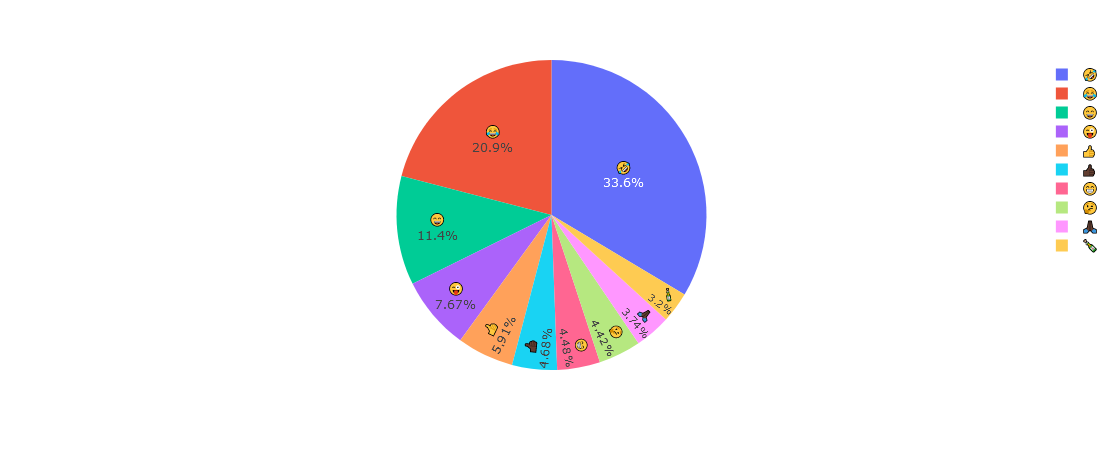

In [37]:
import plotly.express as px
fig = px.pie(emoji_df[:10], values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Person Wise Emoji Distribution

Emoji Distribution for Didier Forbi Melone


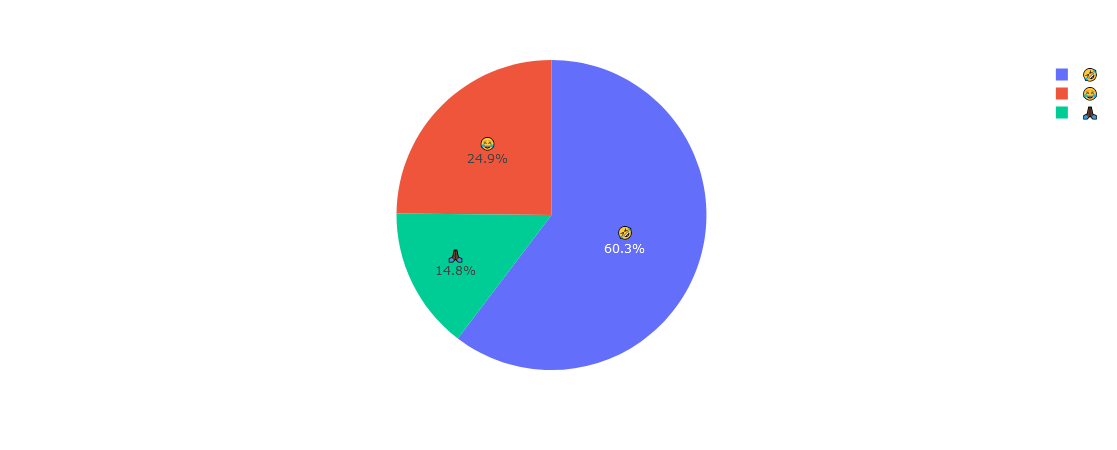

Emoji Distribution for FChe


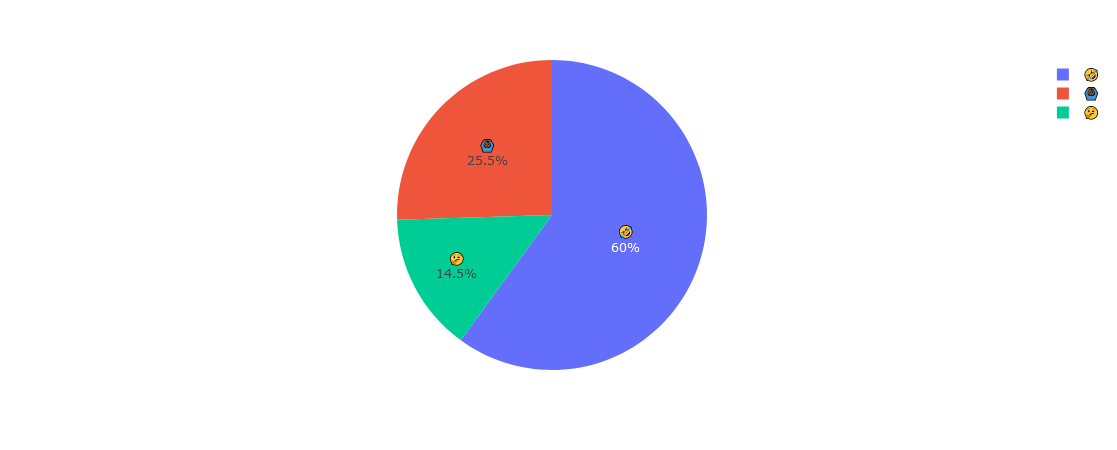

Emoji Distribution for Aloysius Chi


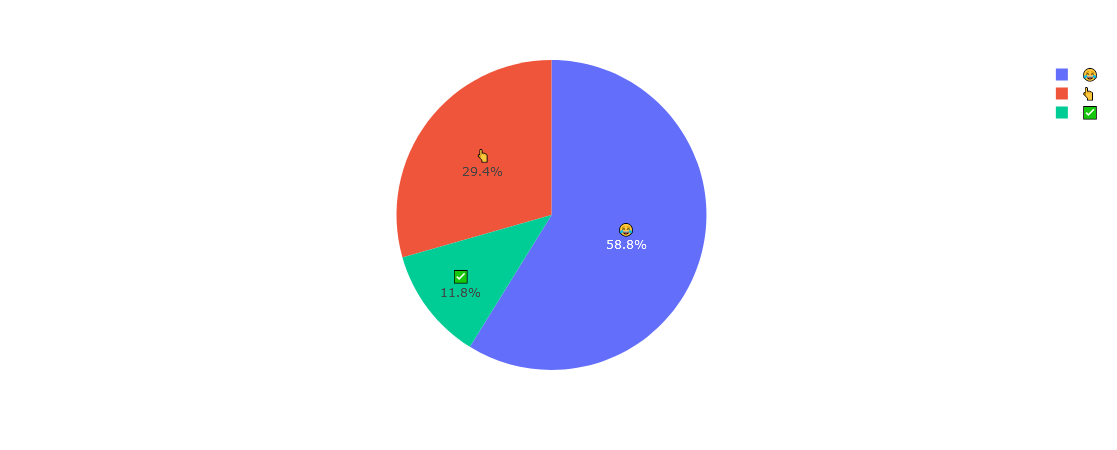

Emoji Distribution for Adrian Wara


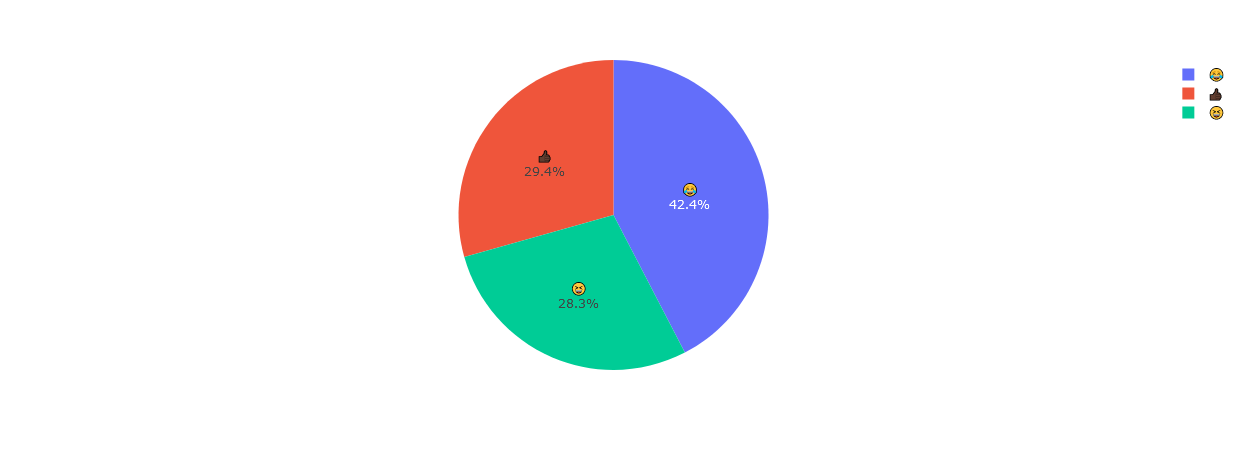

Emoji Distribution for Osric Navti


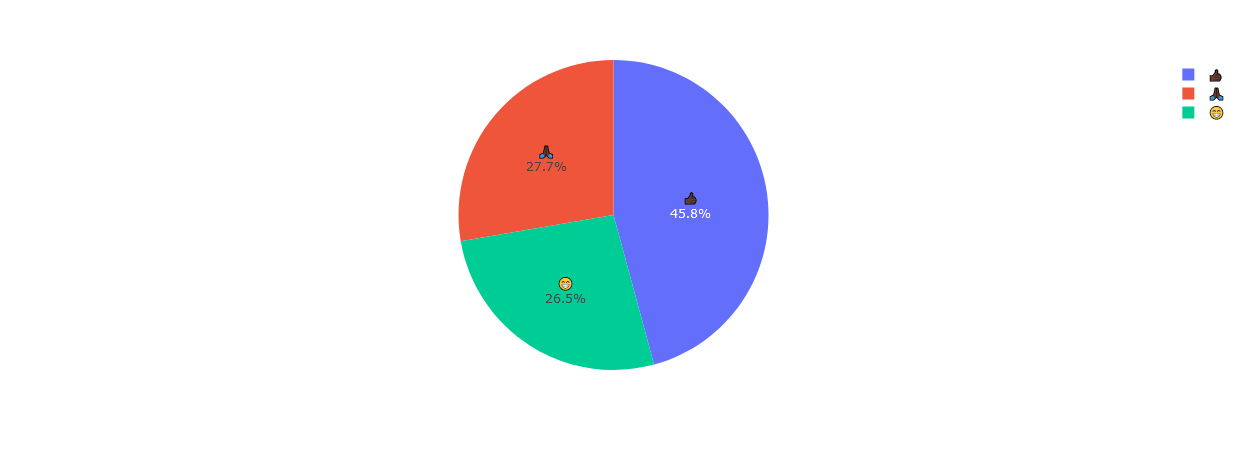

Emoji Distribution for Ernest Tonka


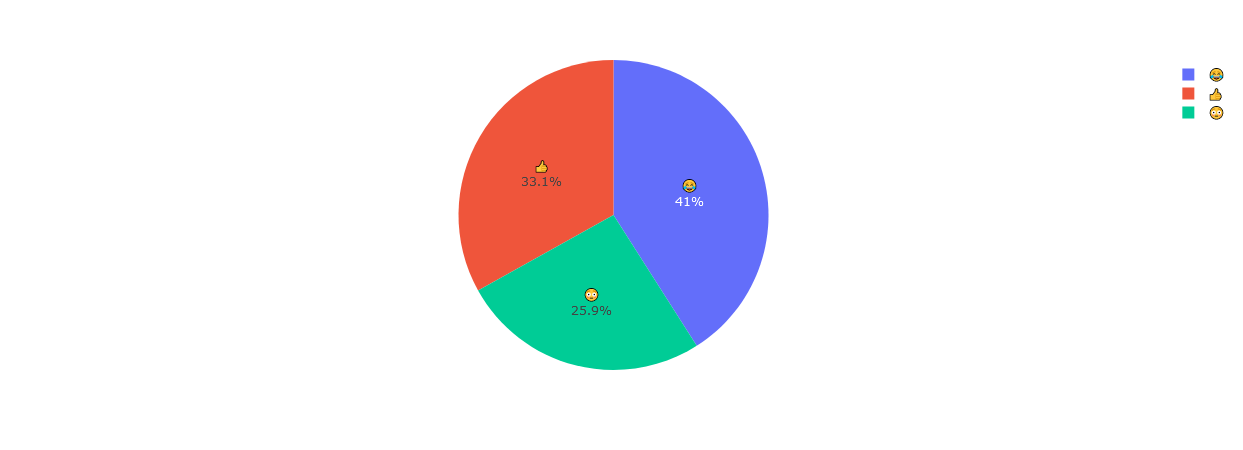

Emoji Distribution for Tamasang (Boy)


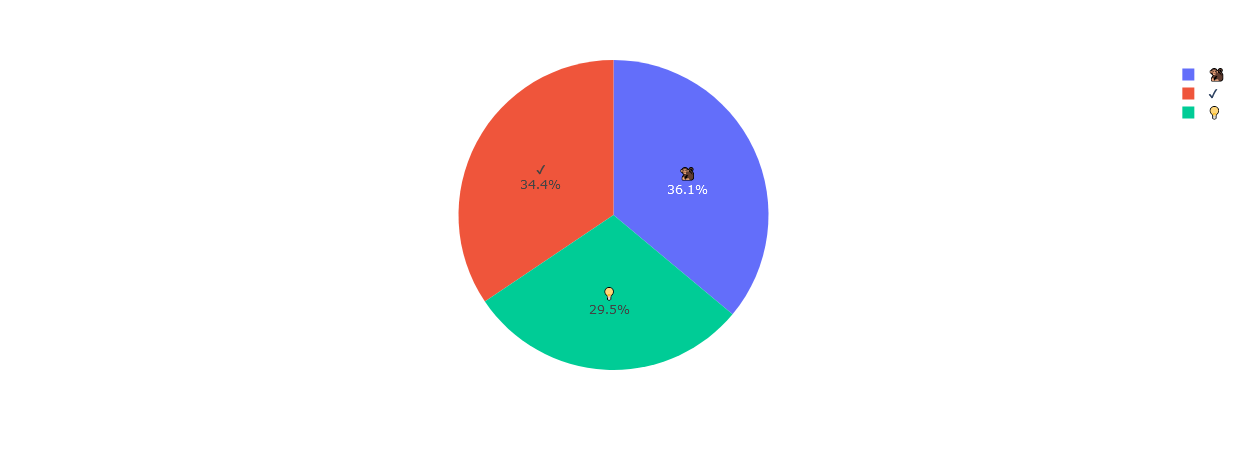

Emoji Distribution for George Che


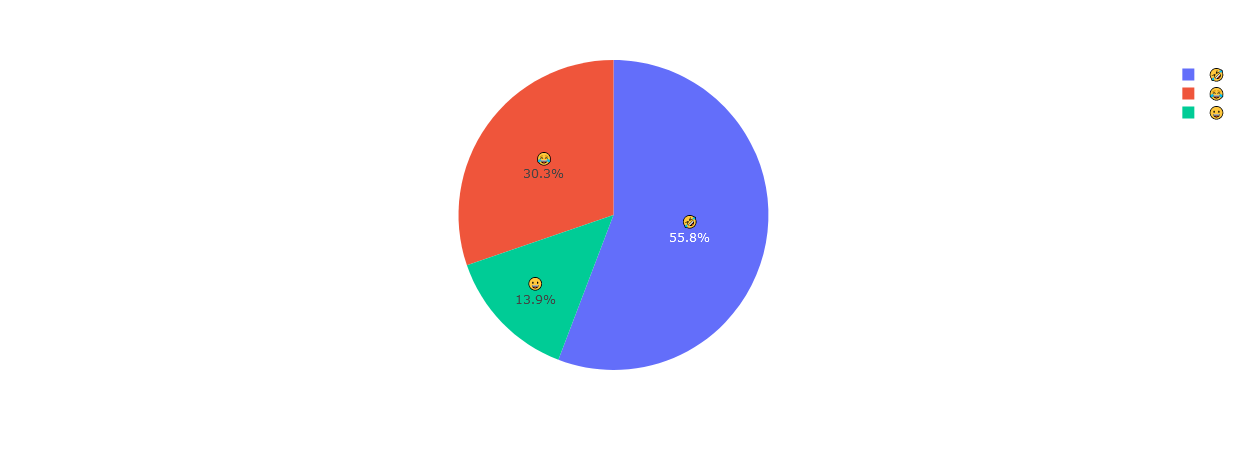

Emoji Distribution for John Fonta


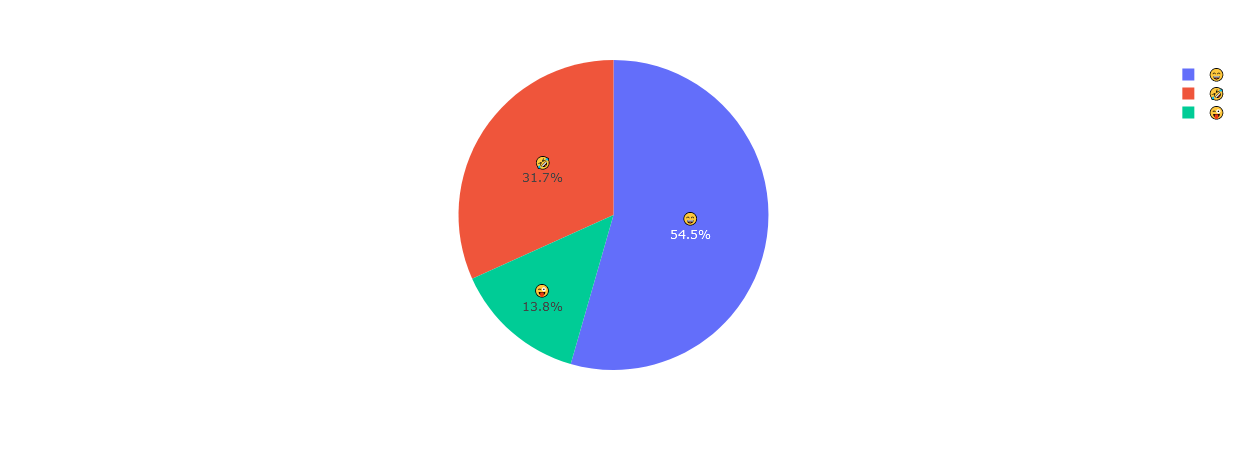

Emoji Distribution for Germanus Bah


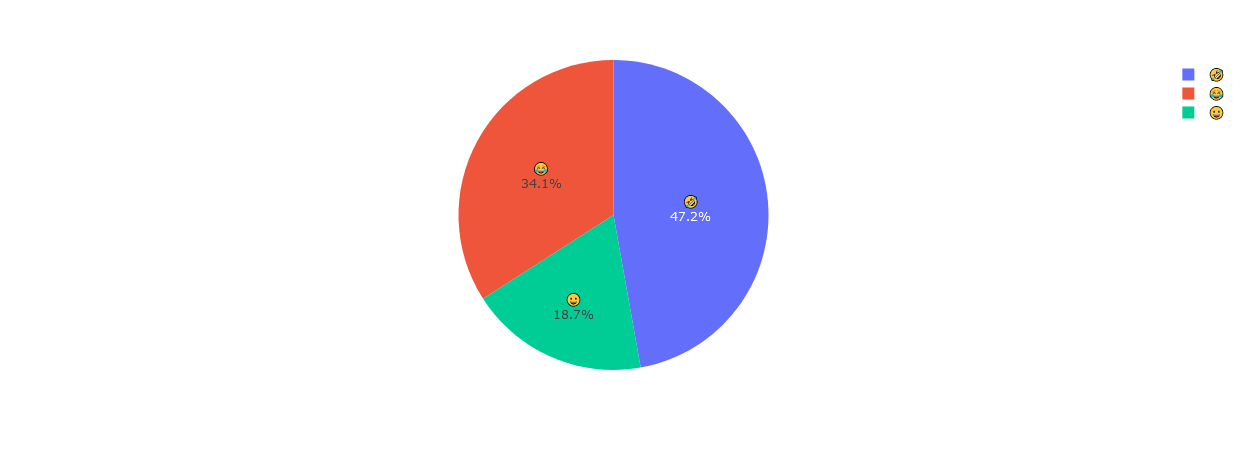

Emoji Distribution for +237 51130708


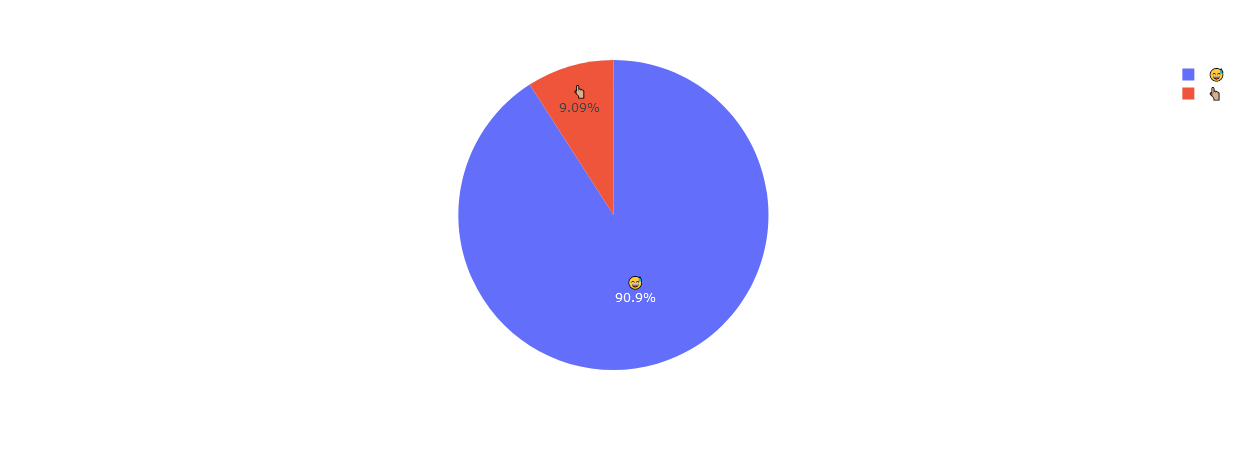

Emoji Distribution for Gabriel Asongwe


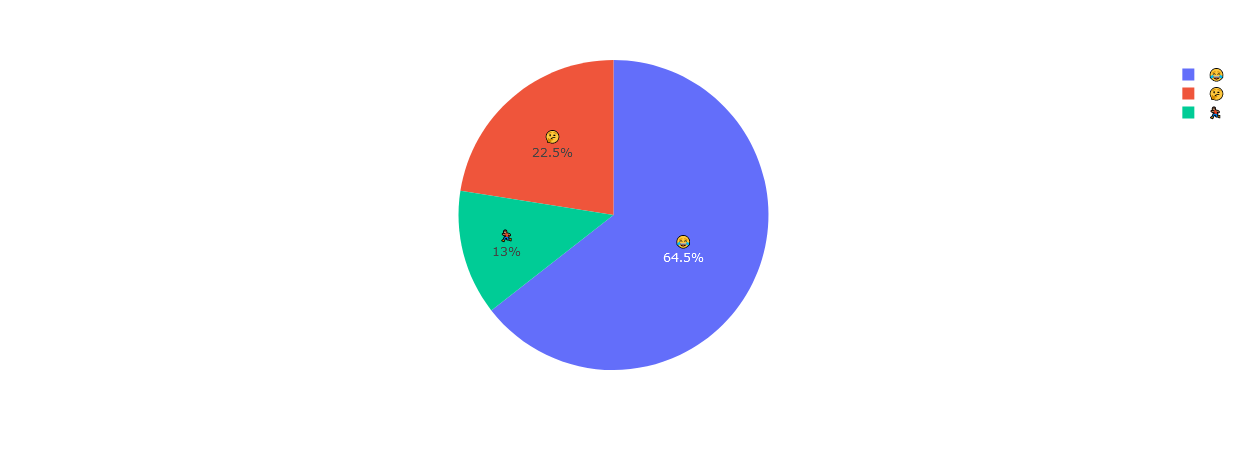

Emoji Distribution for Louis Kiru


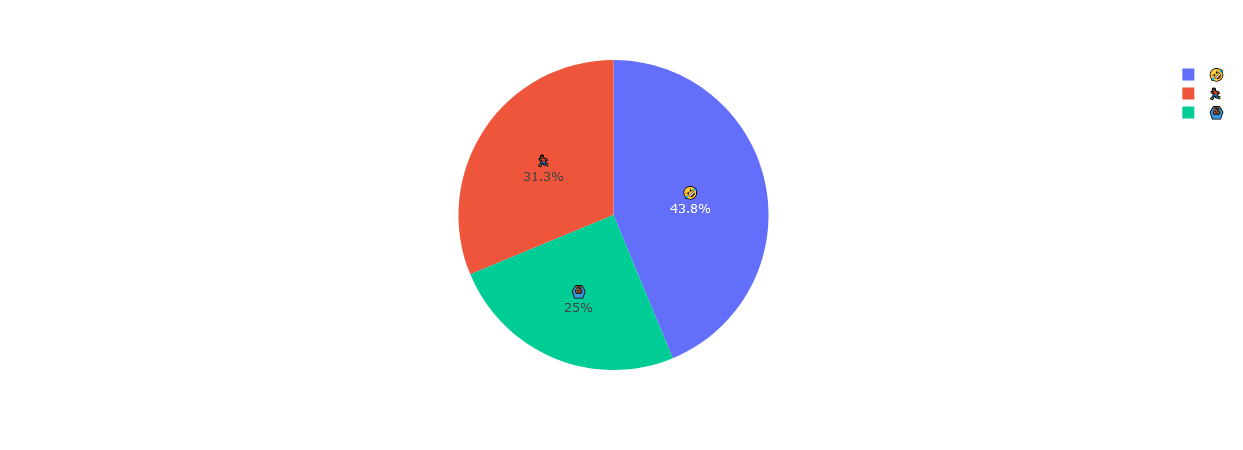

Emoji Distribution for Damian Anong


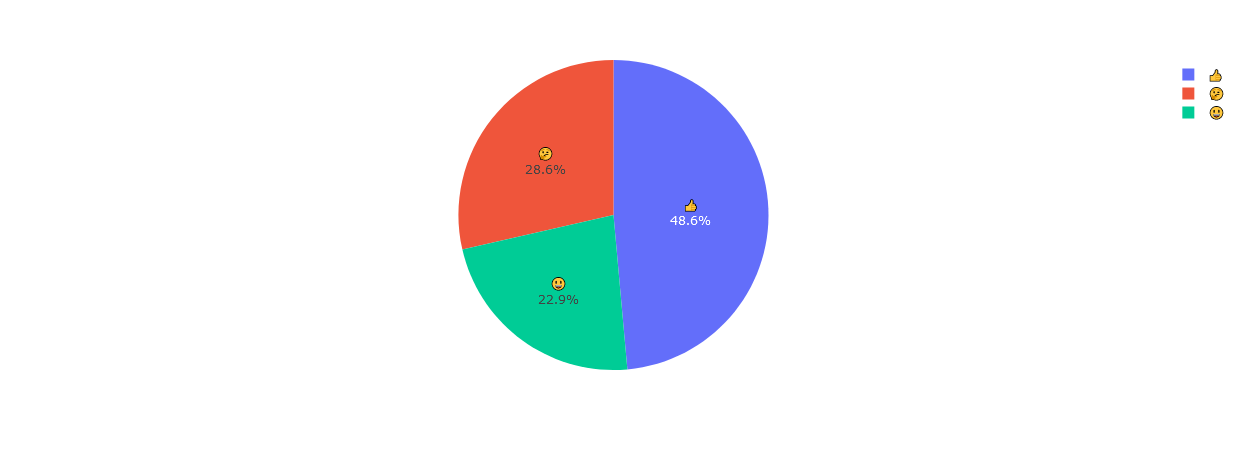

Emoji Distribution for Bob Chi Neba


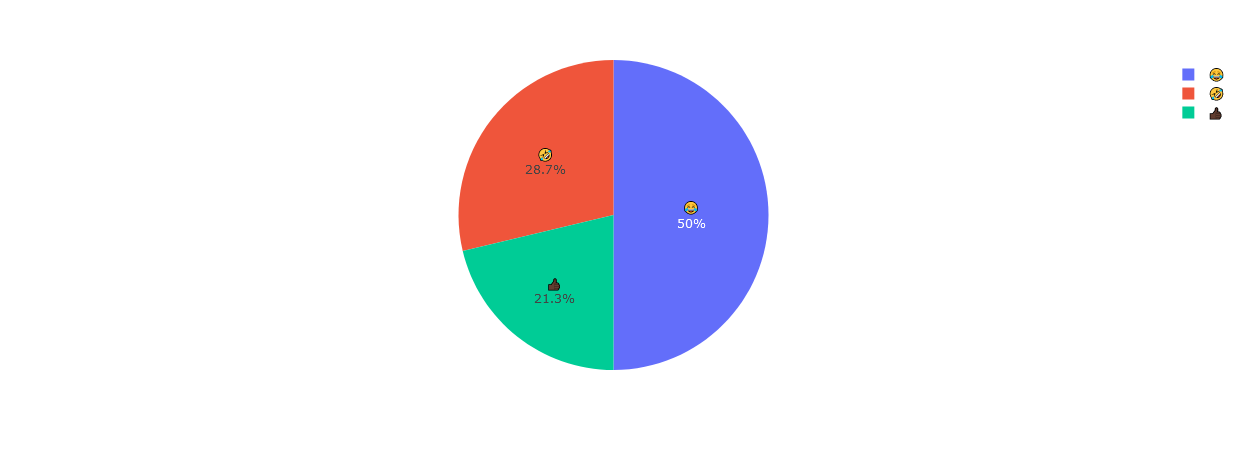

Emoji Distribution for Cletus Fonyam


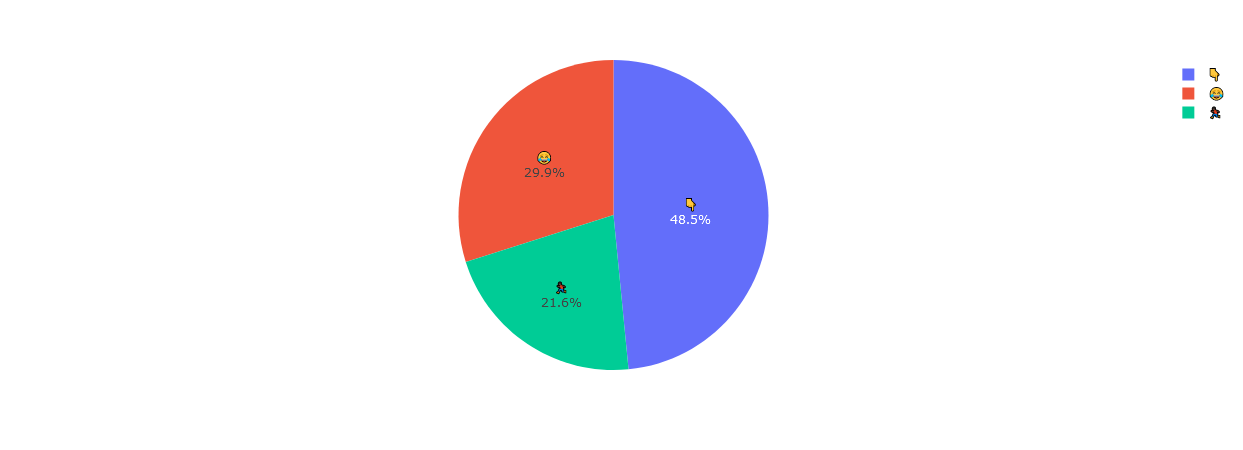

Emoji Distribution for Pascal K'kongson


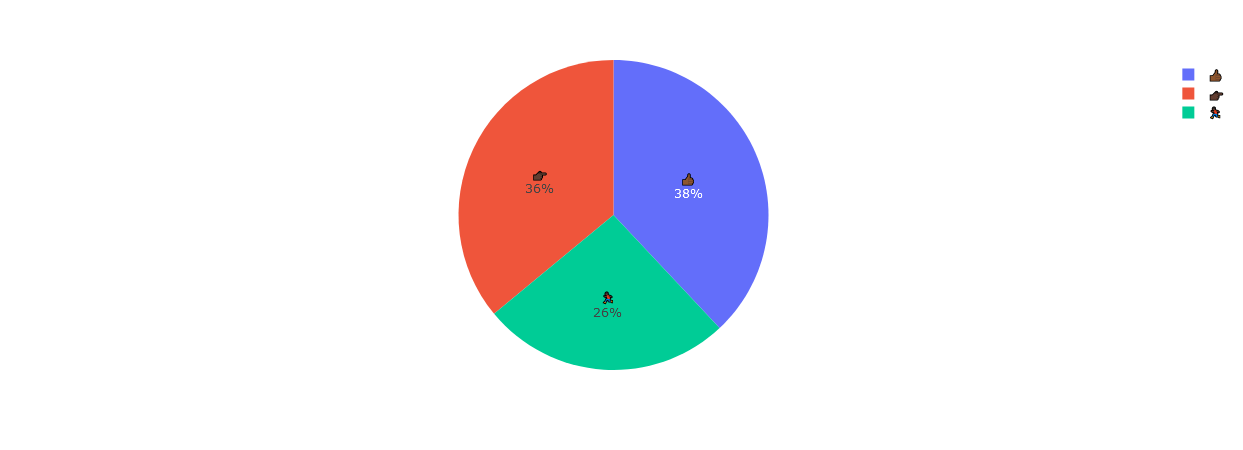

Emoji Distribution for Bedes


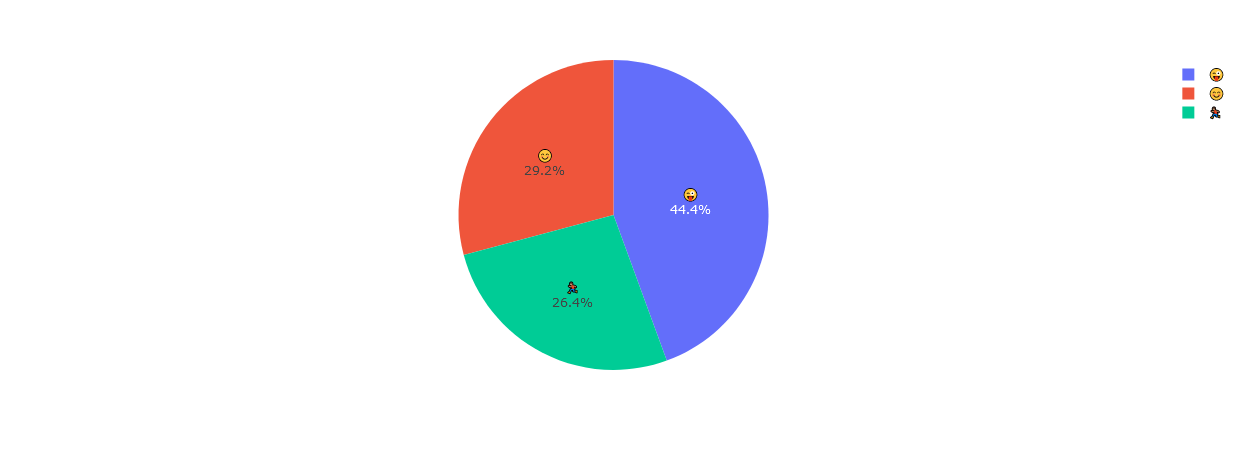

Emoji Distribution for +237 75079262


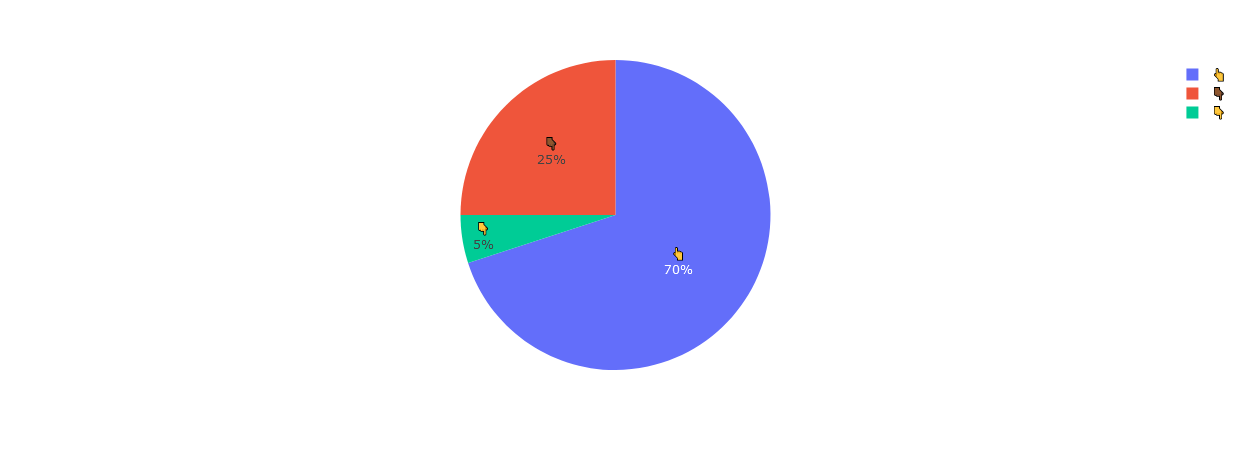

Emoji Distribution for +237 79369186


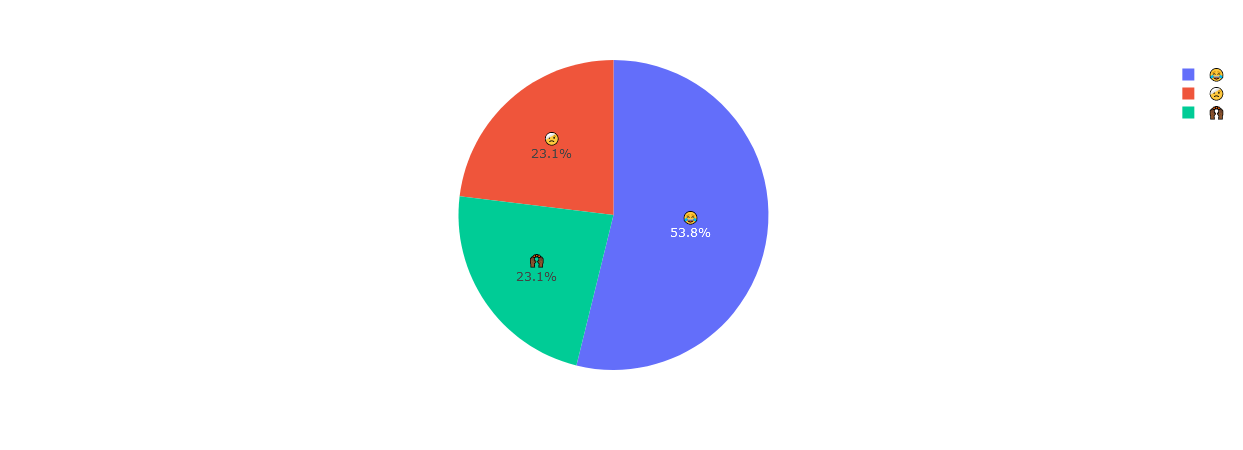

Emoji Distribution for Awenti Valentine


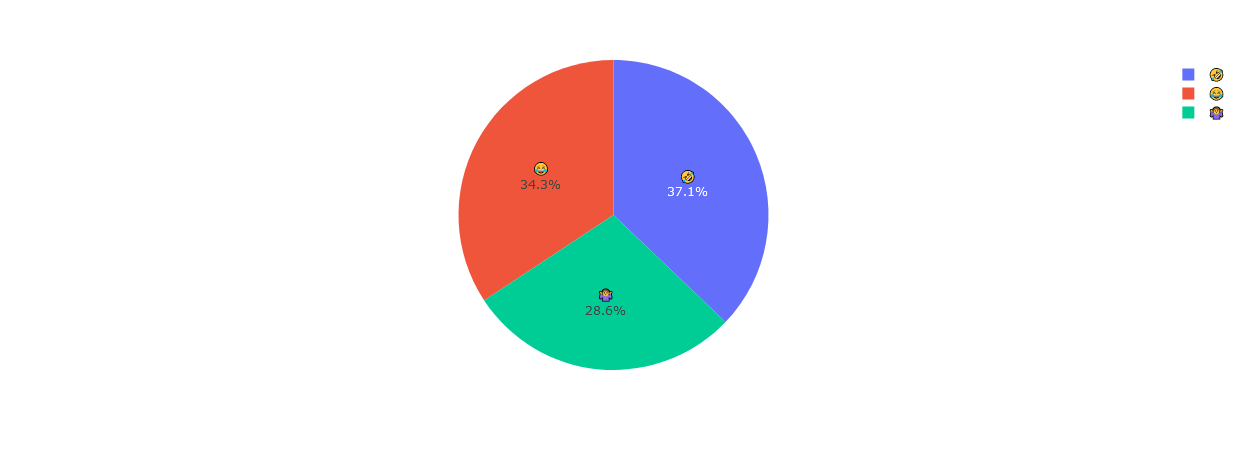

Emoji Distribution for Ben Sona


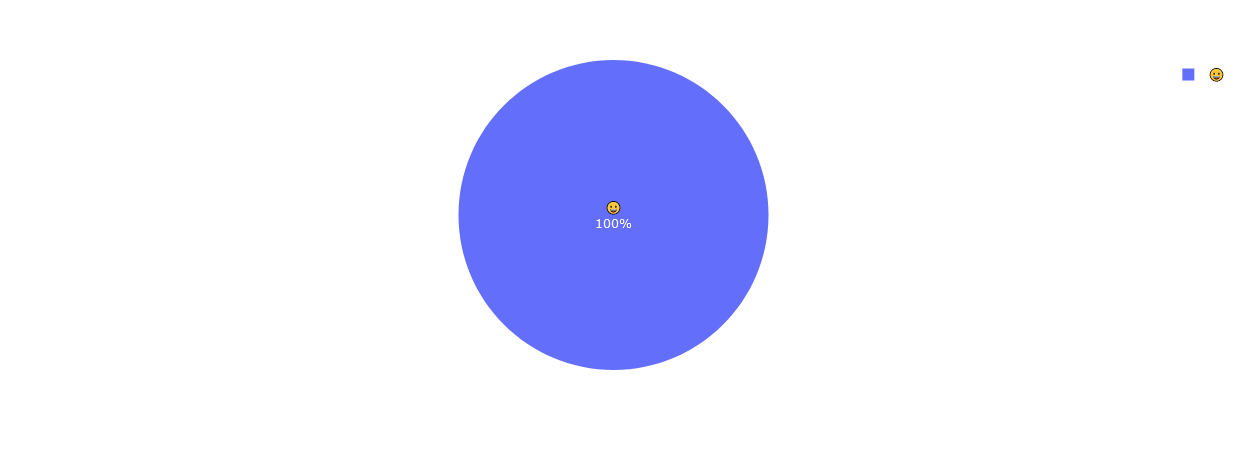

Emoji Distribution for Leyland Elange


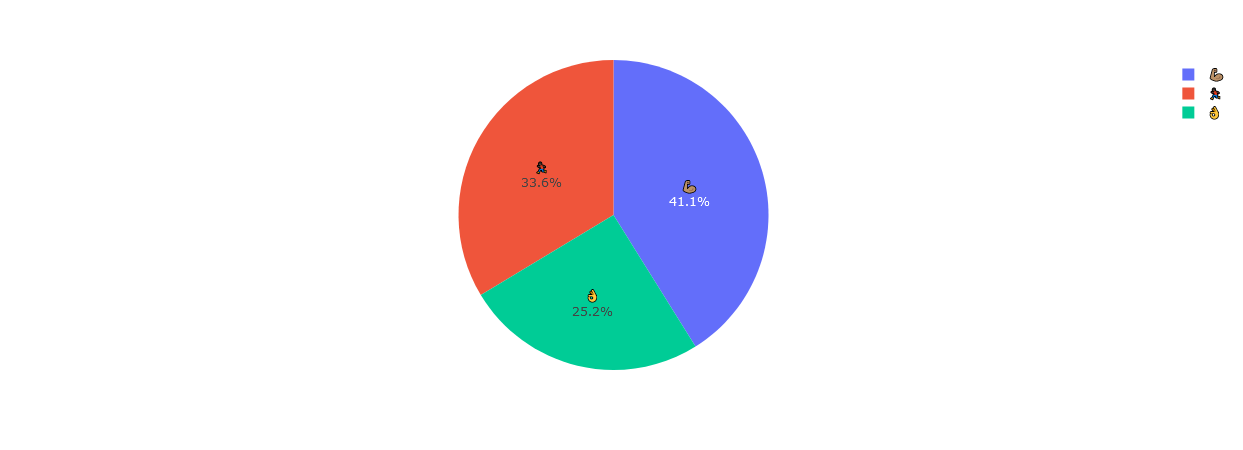

Emoji Distribution for Fidelis Ateghang


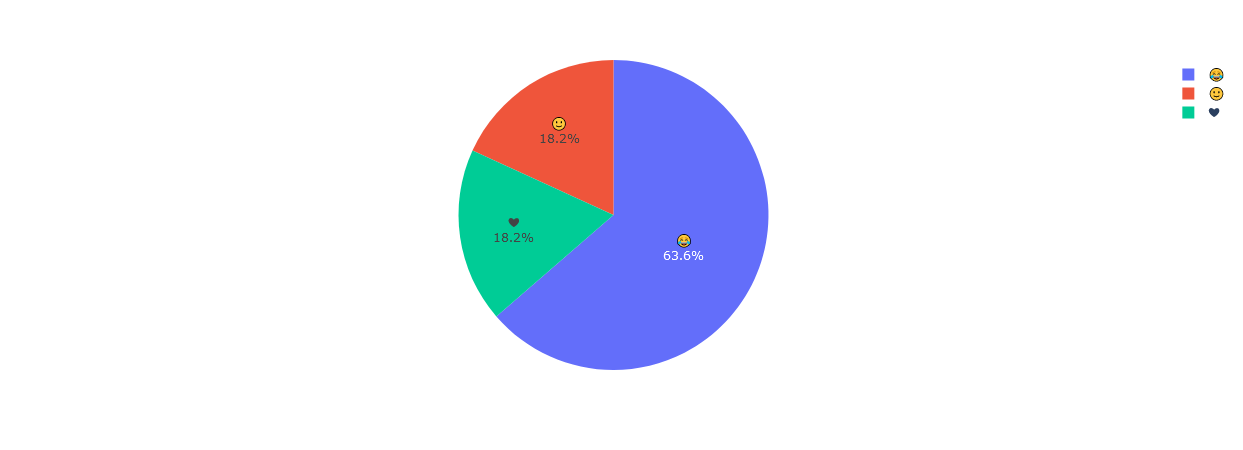

Emoji Distribution for Kaba Kristen Nubia


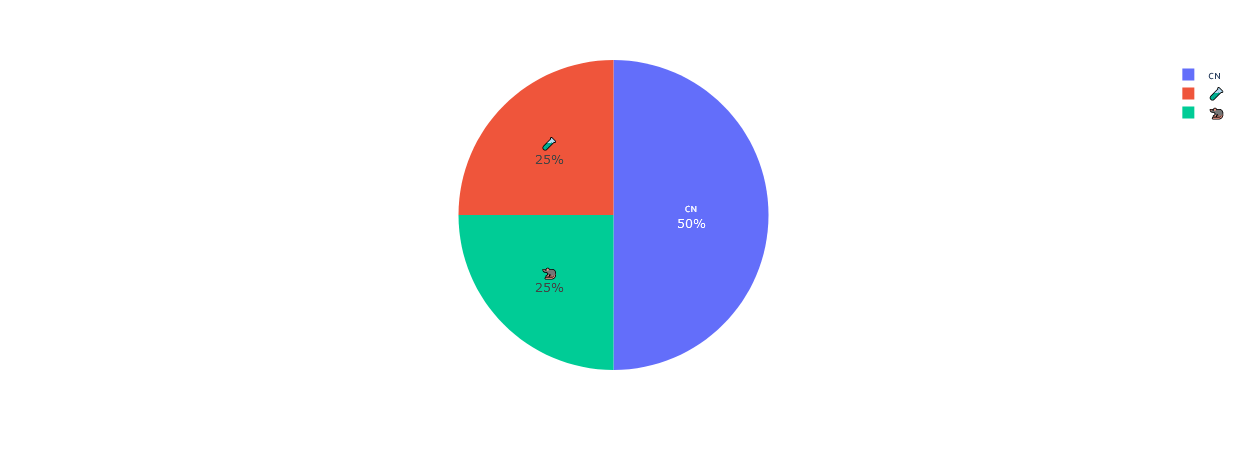

Emoji Distribution for Floribert Kangkolo


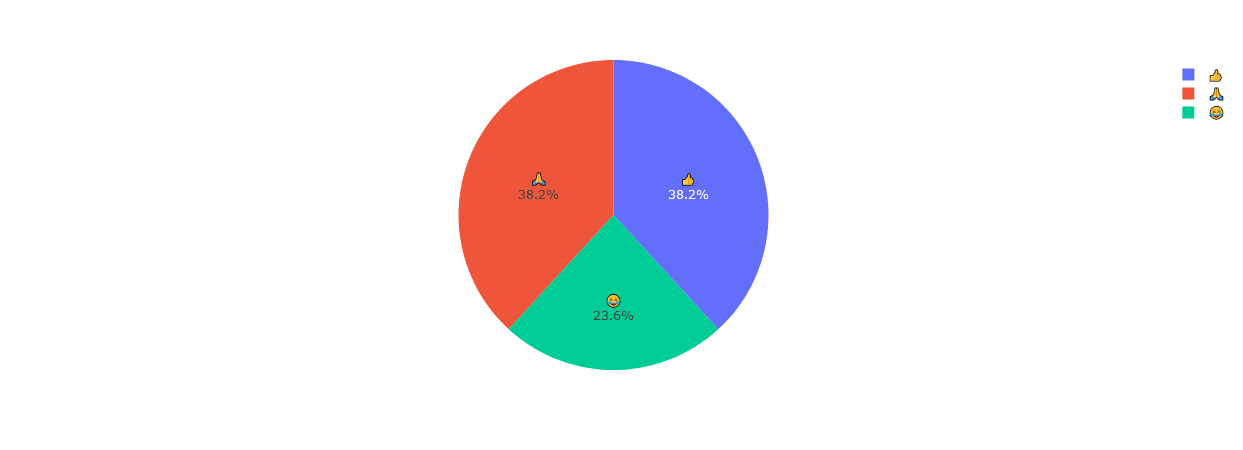

Emoji Distribution for Ndukum Julius


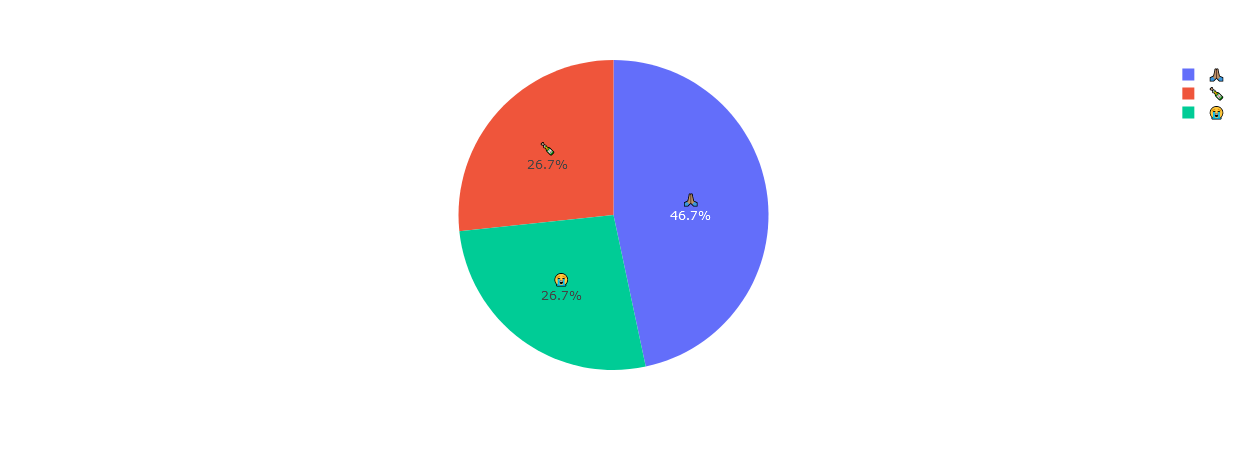

Emoji Distribution for Magnus Mutah Che


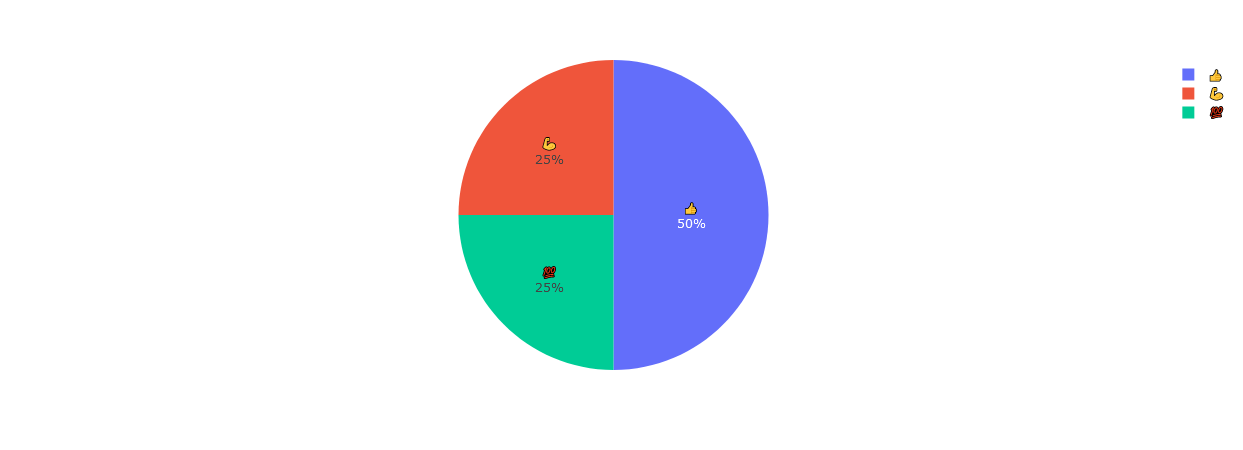

Emoji Distribution for Kingsley Wara


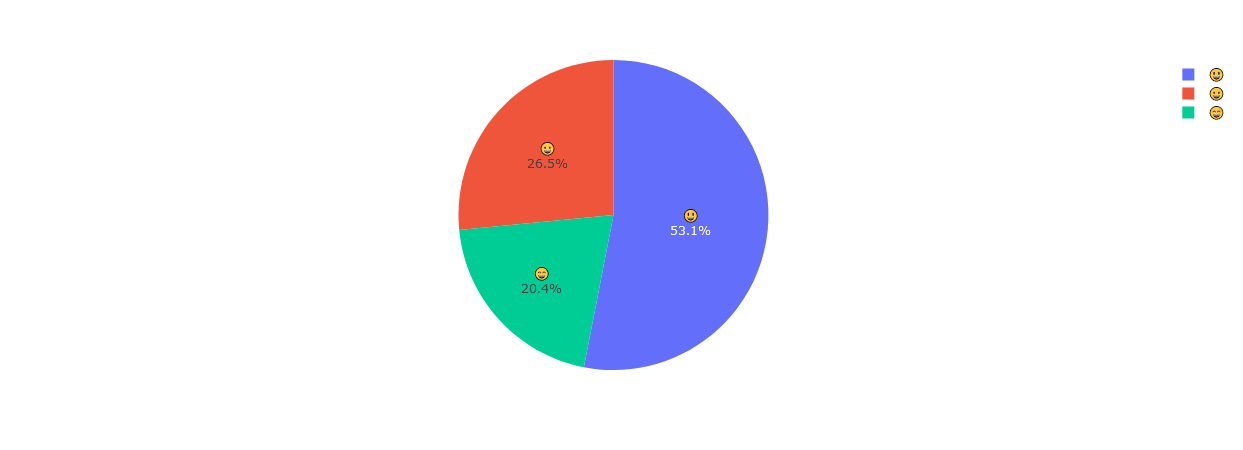

Emoji Distribution for Innocent Bobga


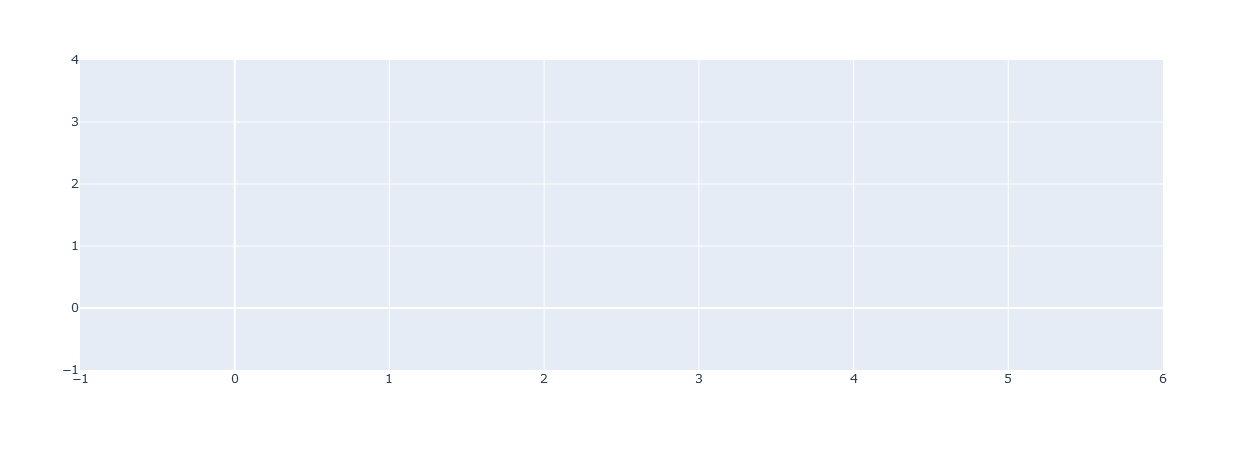

Emoji Distribution for Boniface Nasah


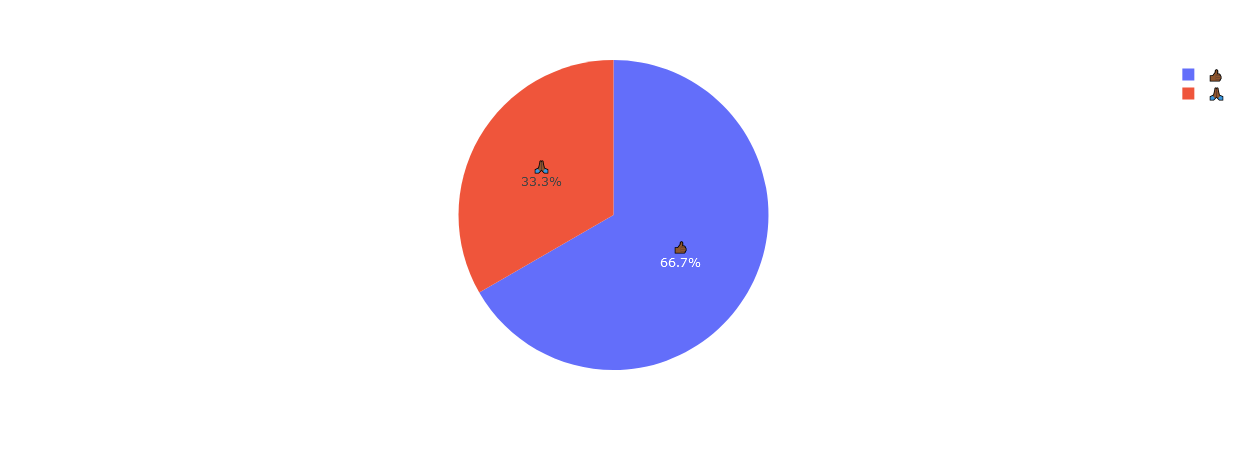

Emoji Distribution for Valentine Seghanka


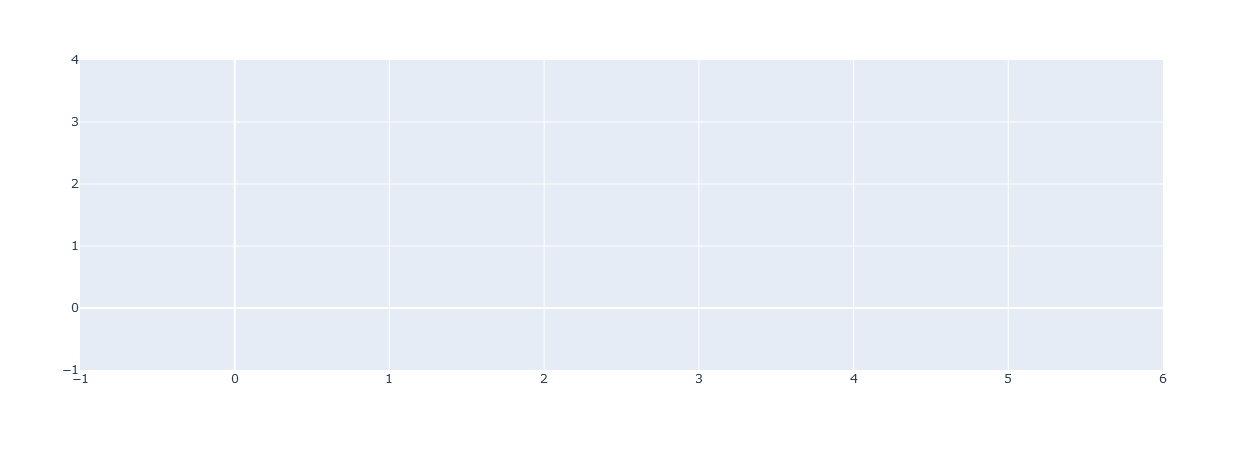

Emoji Distribution for Marinus Yong


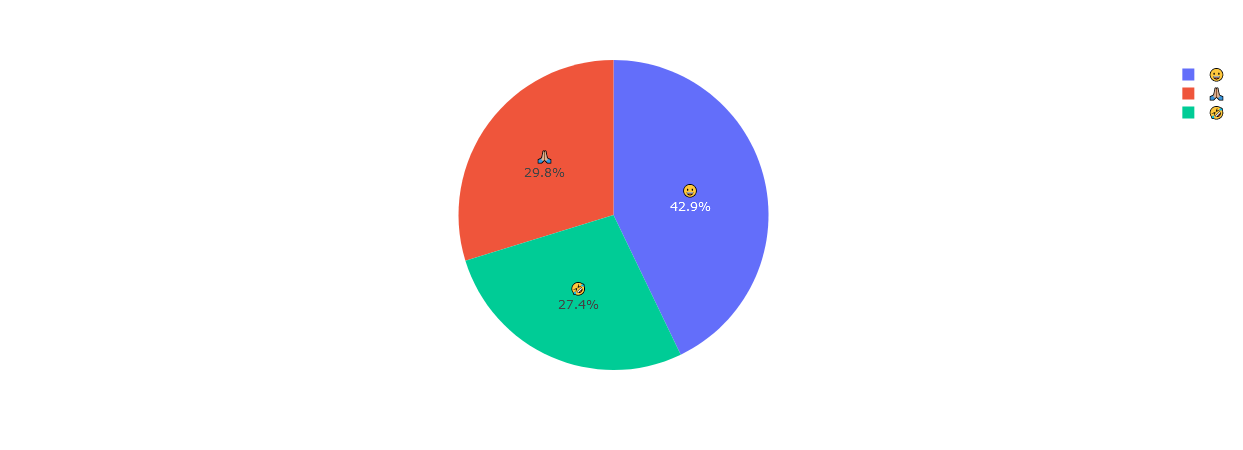

Emoji Distribution for Terence Ndiagang


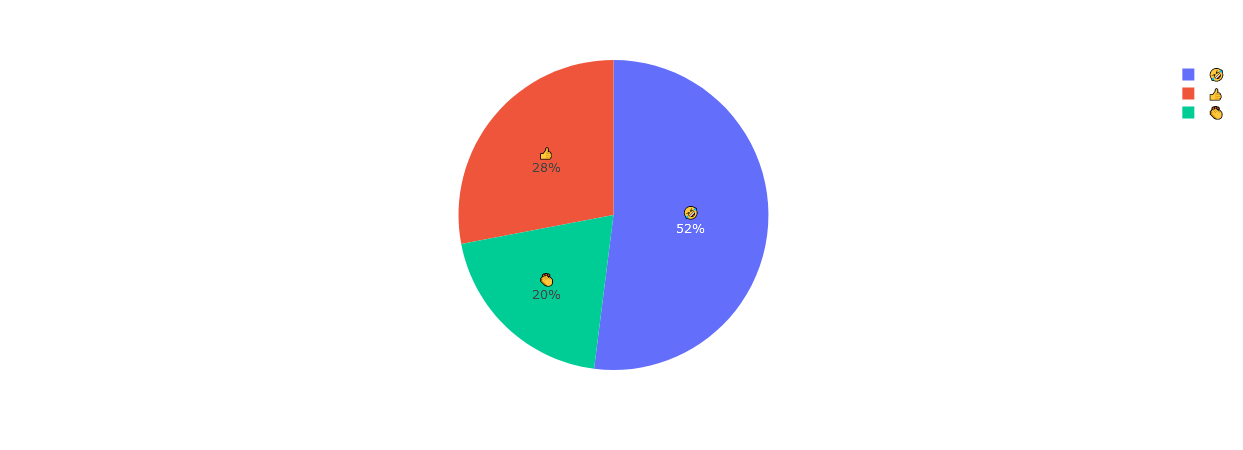

Emoji Distribution for Chris Boyo


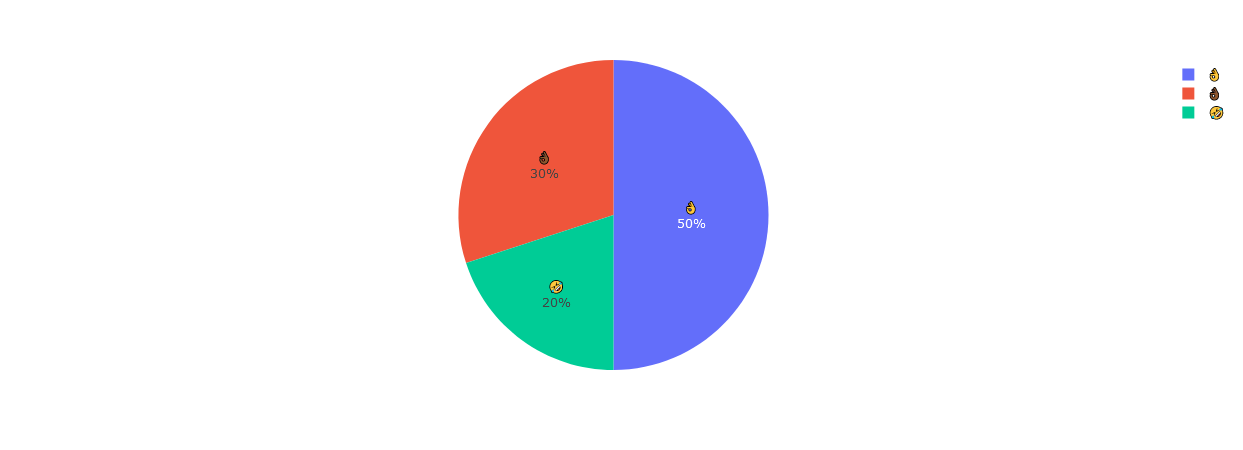

Emoji Distribution for Jean Pascal Law


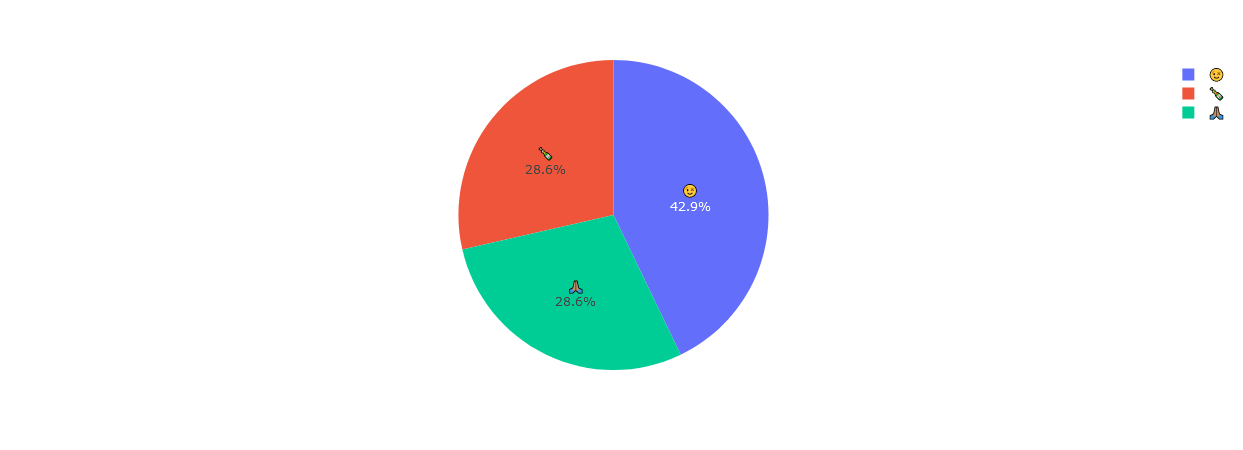

Emoji Distribution for +1 (301) 437-6591


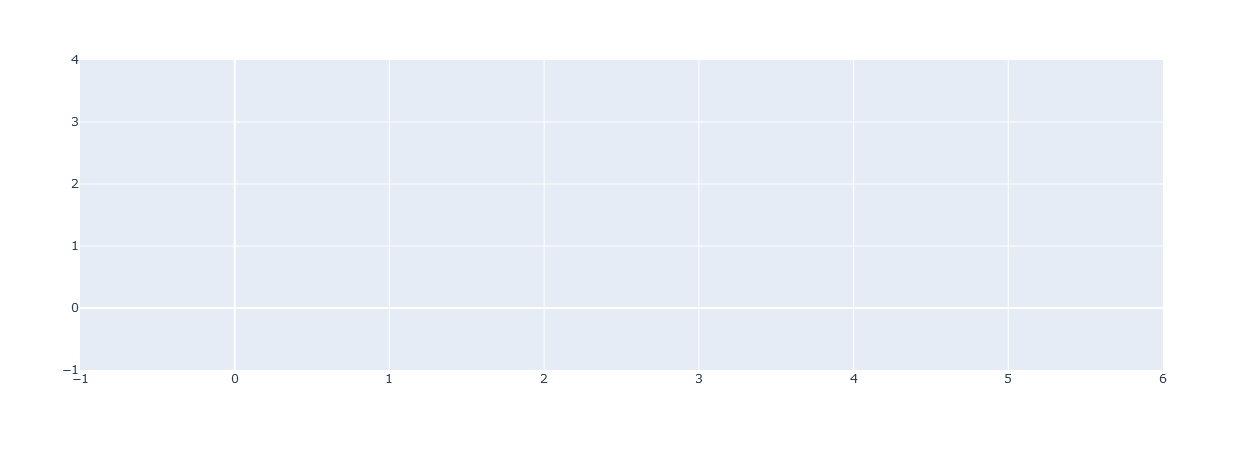

Emoji Distribution for Edwin Chilla


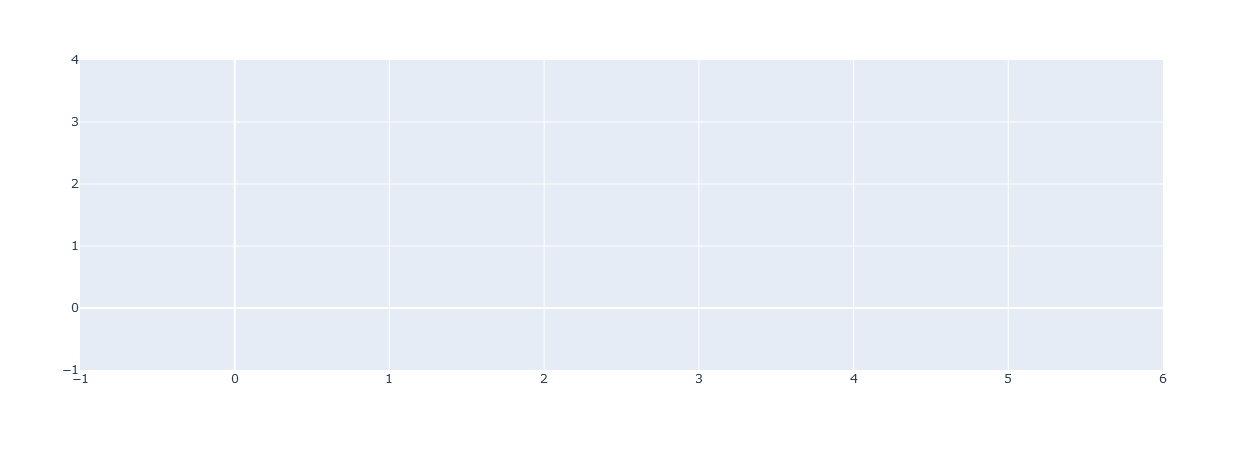

Emoji Distribution for Michael Che


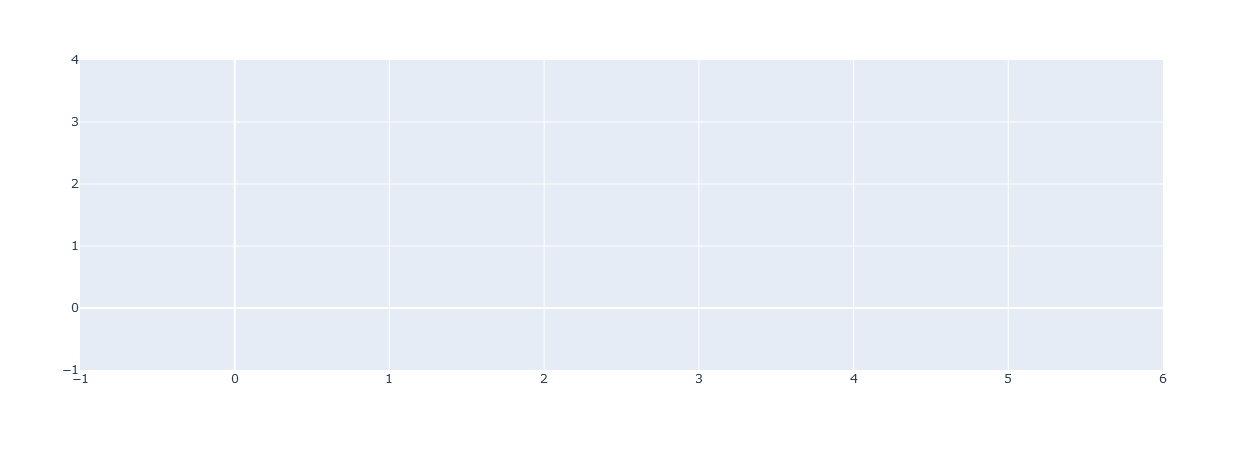

Emoji Distribution for Joseph Allomba


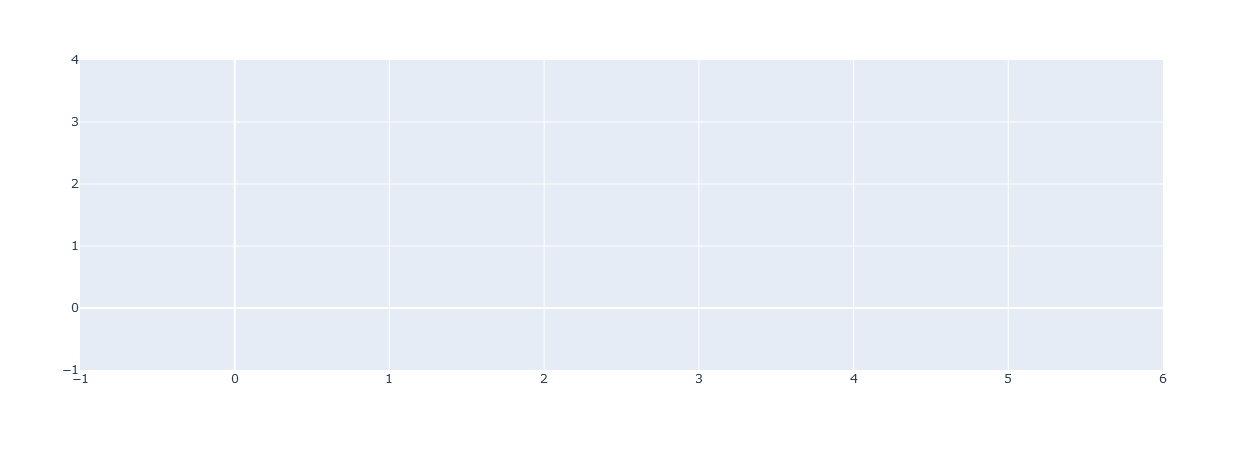

Emoji Distribution for Awah Edward


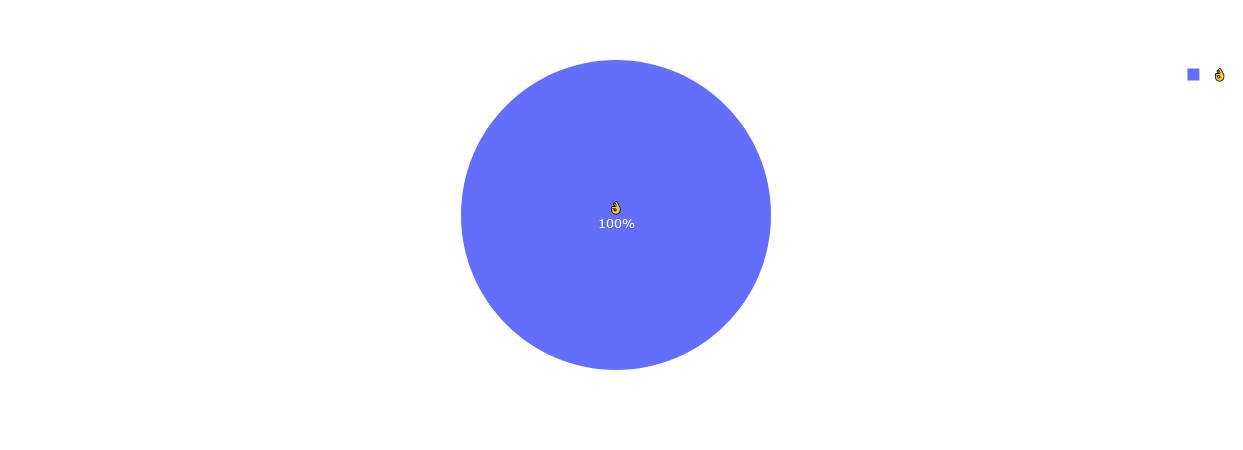

Emoji Distribution for Jude Mbih


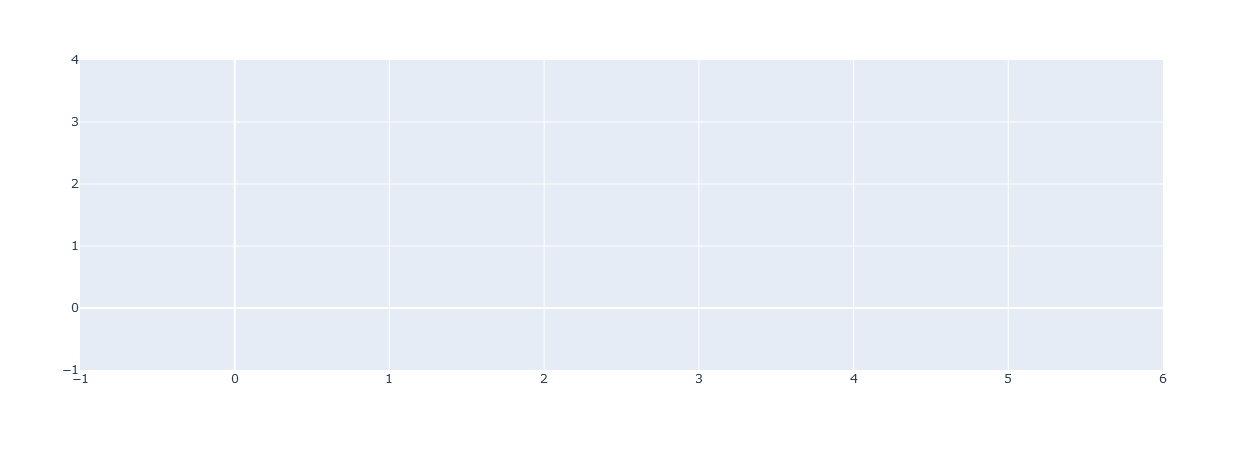

Emoji Distribution for Achidi Julius Ndangi


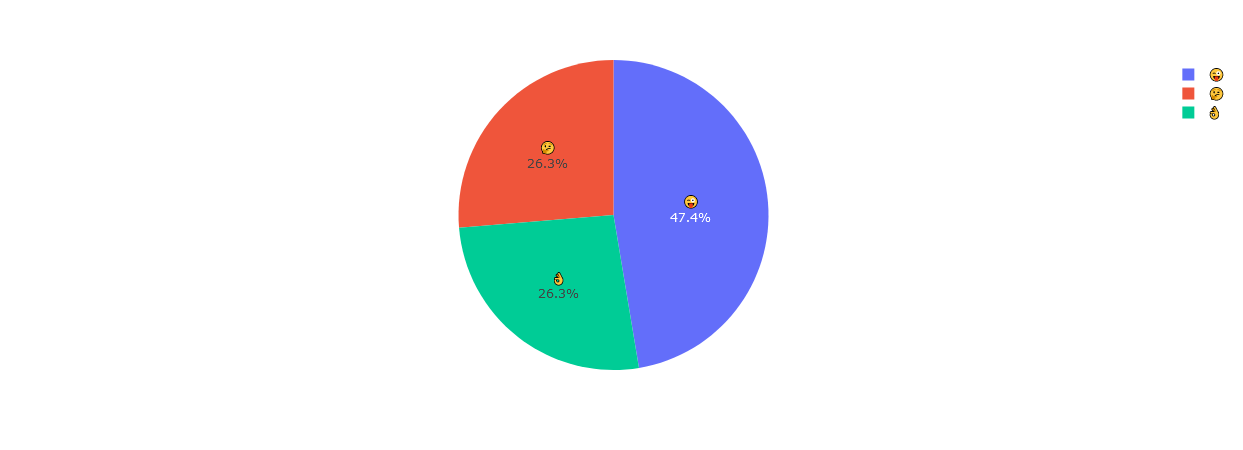

Emoji Distribution for Erico Ngante


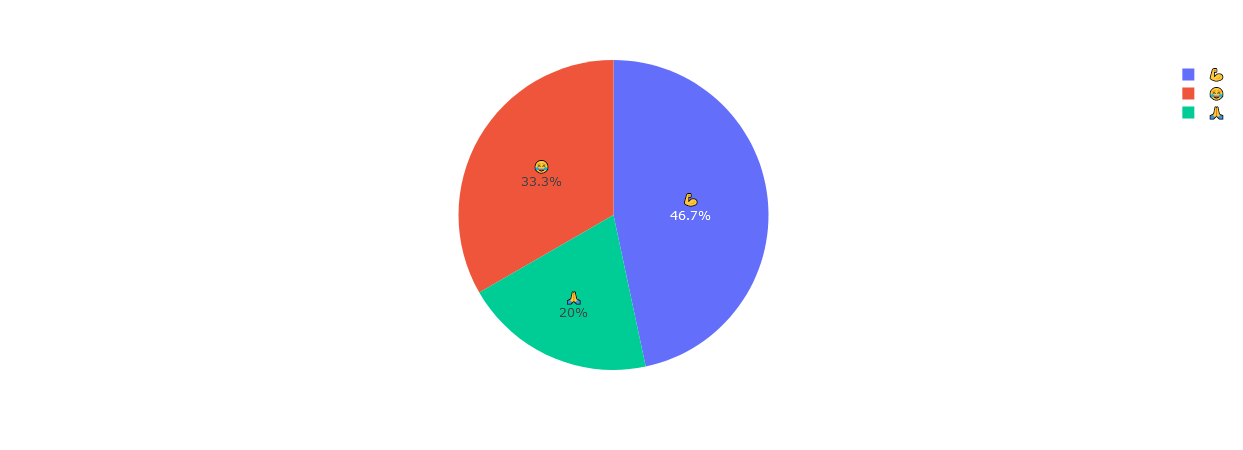

Emoji Distribution for Emmanuel Nkwenti


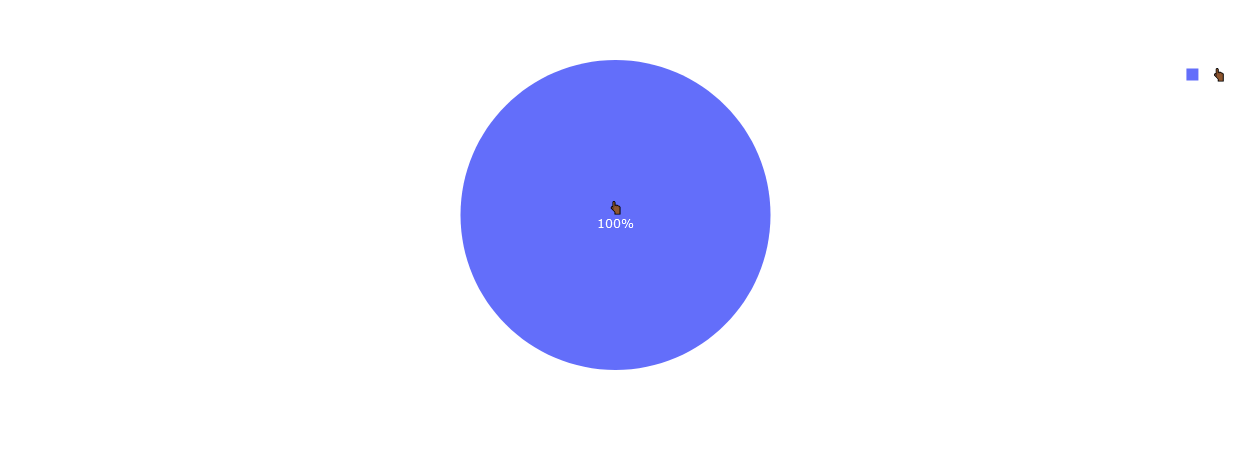

Emoji Distribution for Eric Ndangoh


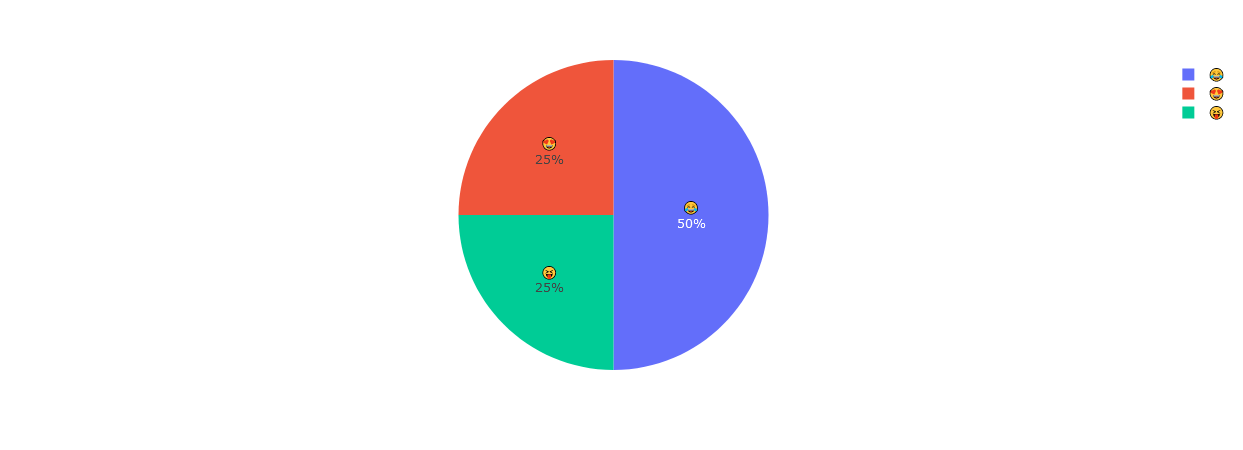

Emoji Distribution for Eric Limen


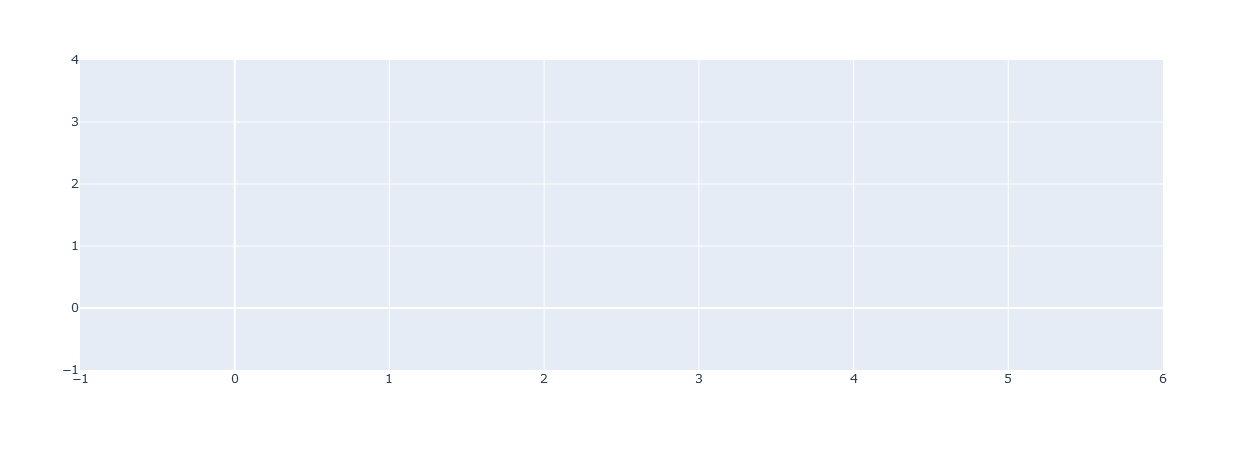

Emoji Distribution for Thescribe Emeka Nzeribe


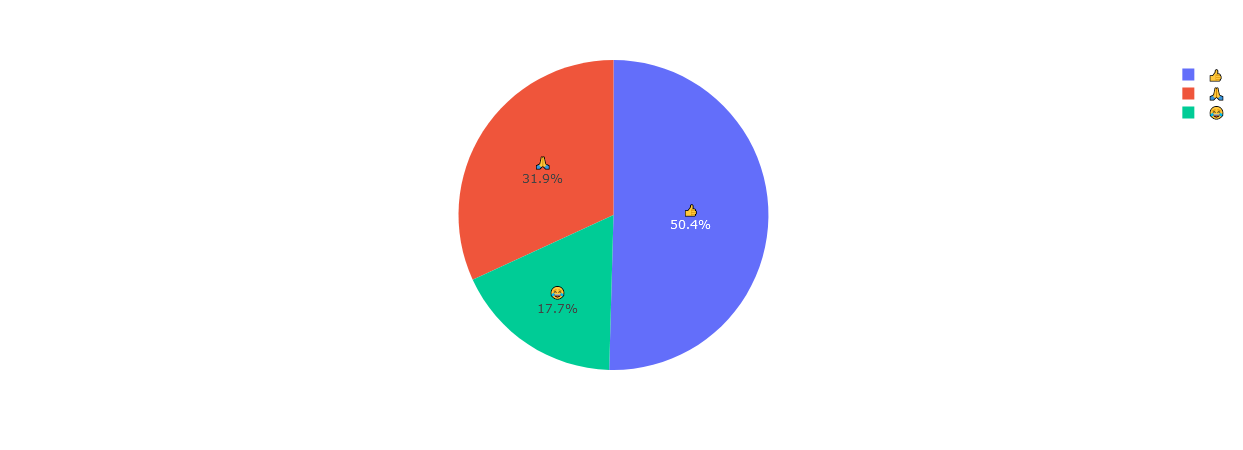

Emoji Distribution for Nico Ngwa


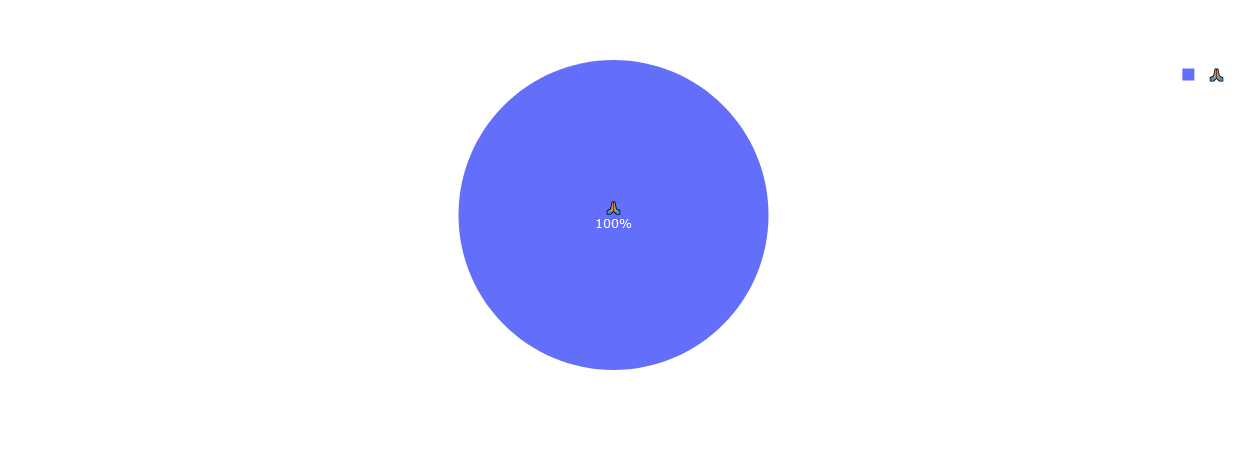

Emoji Distribution for +237 75412226


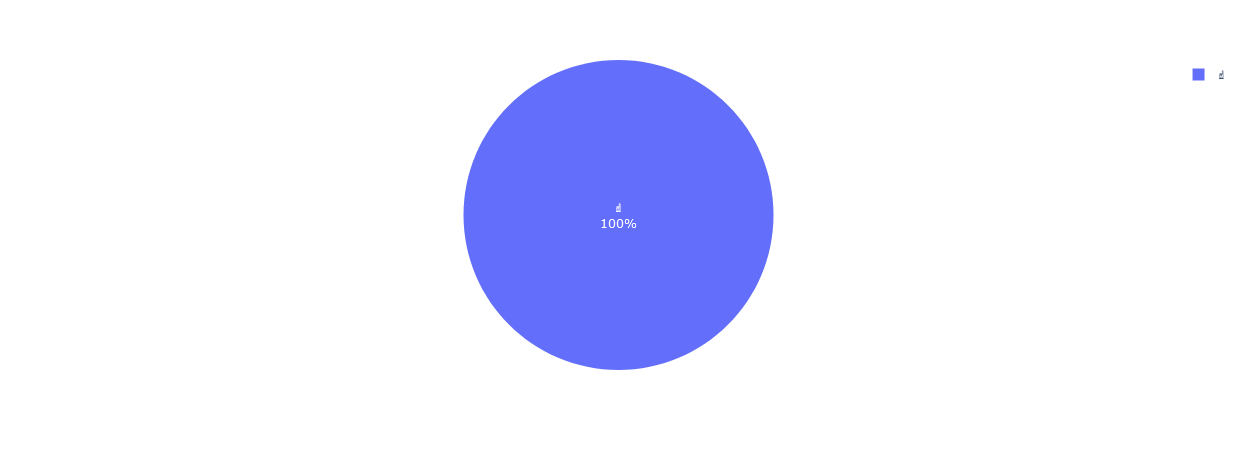

Emoji Distribution for +1 (202) 956-8428


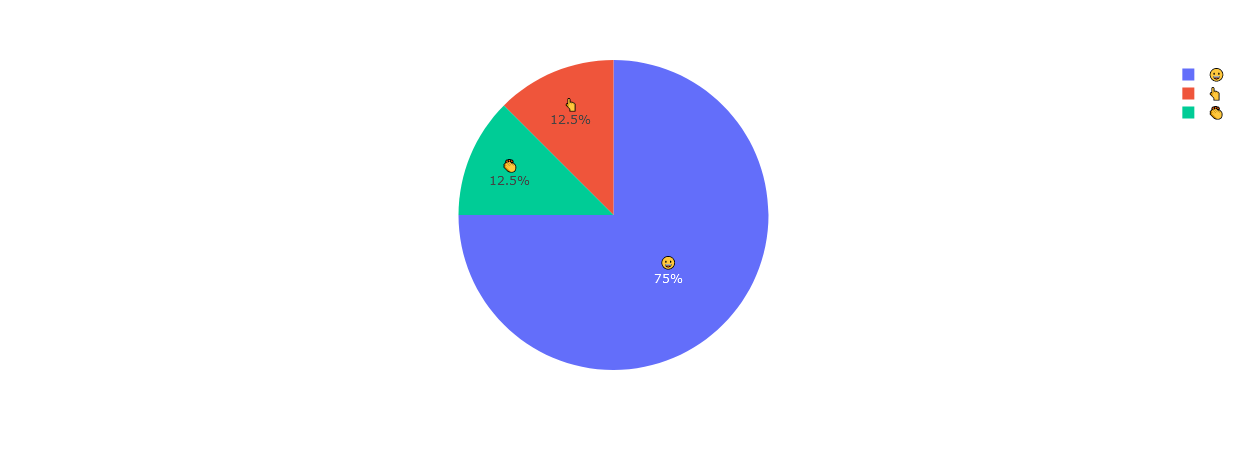

Emoji Distribution for Tochukwu Mbonu


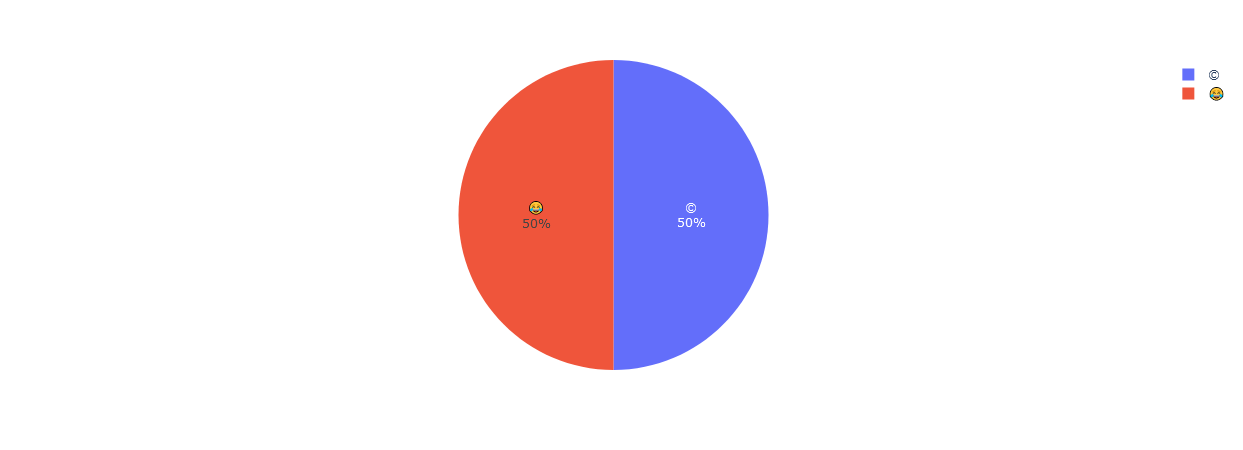

Emoji Distribution for Mike Okeke


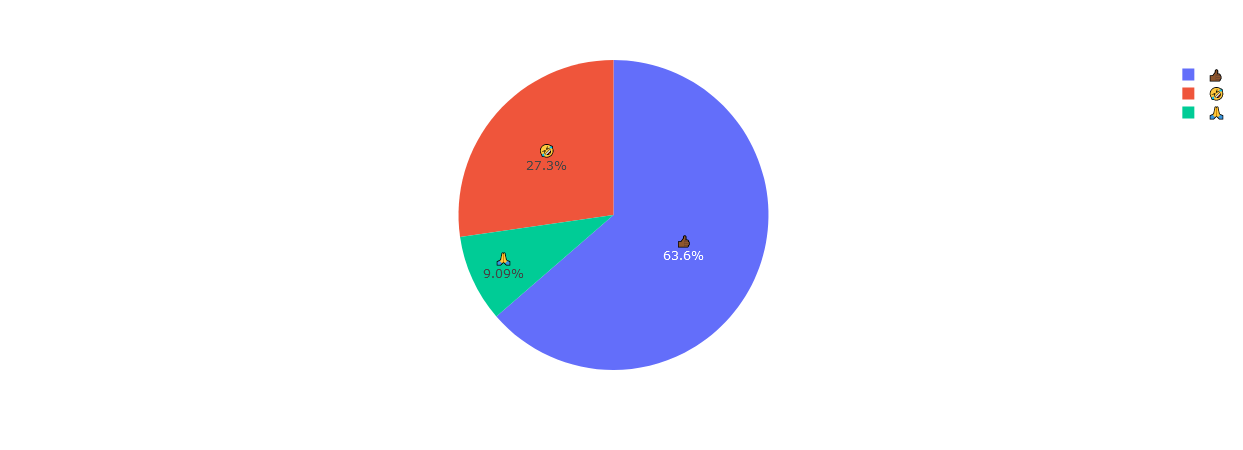

Emoji Distribution for Lovett Elango


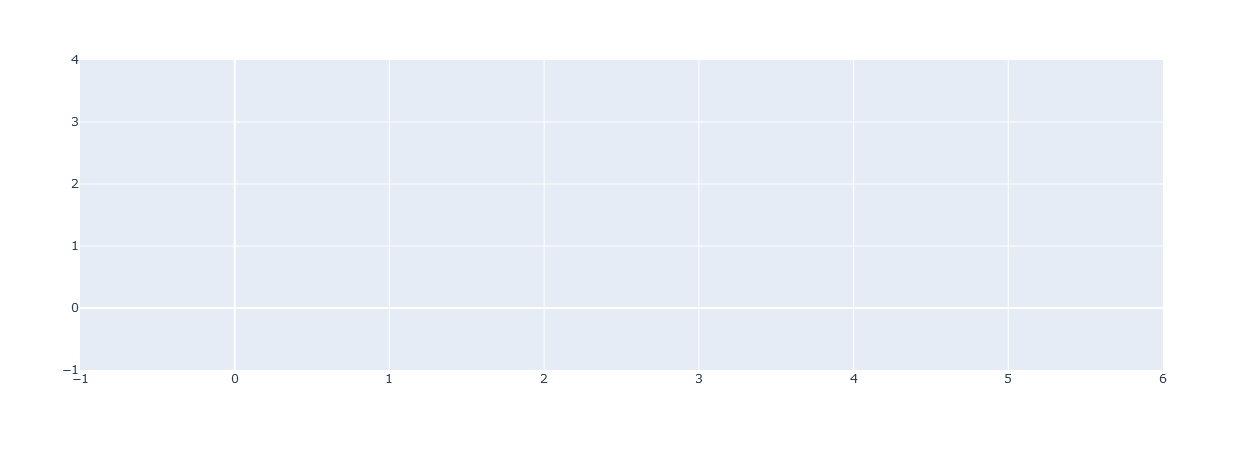

Emoji Distribution for Anthony Boyo


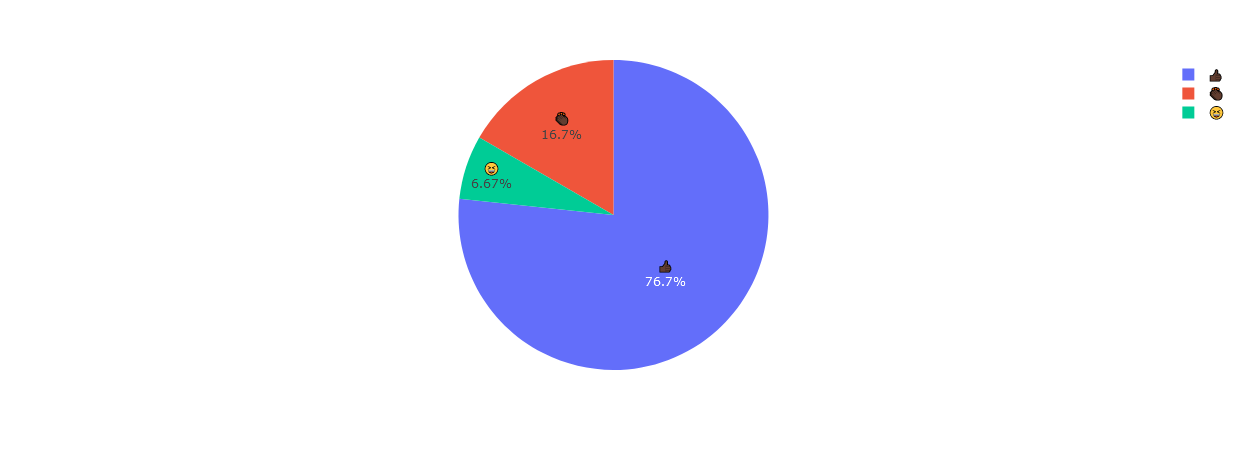

Emoji Distribution for Victor Ndoumbe


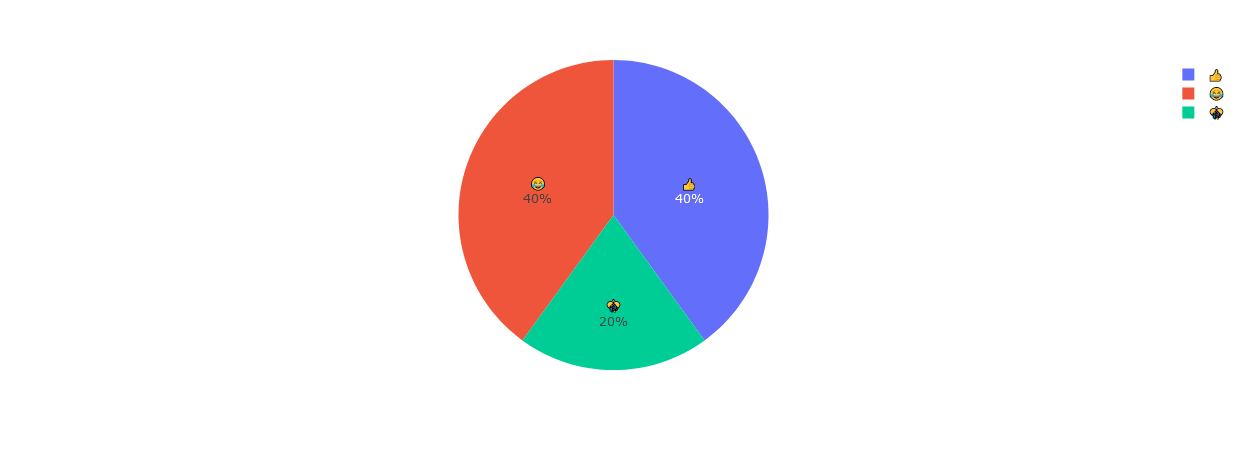

Emoji Distribution for Leo Moh


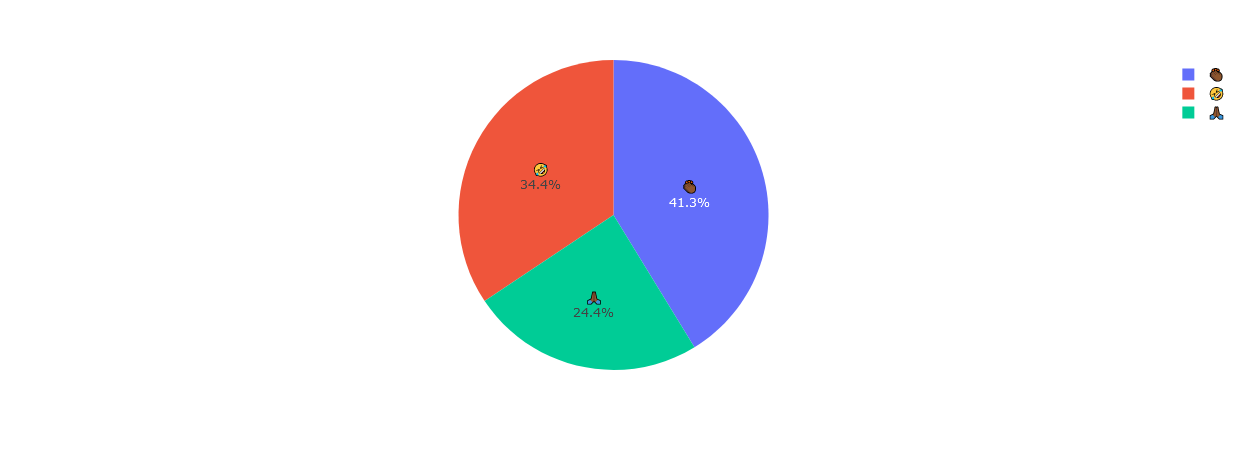

Emoji Distribution for +1 (310) 465-7516


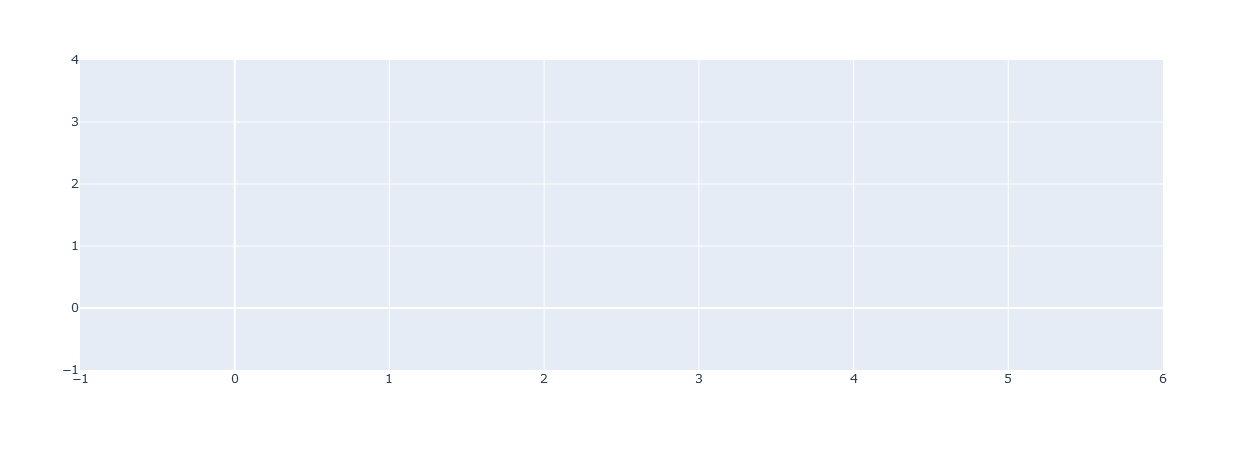

Emoji Distribution for Tangie Cletus


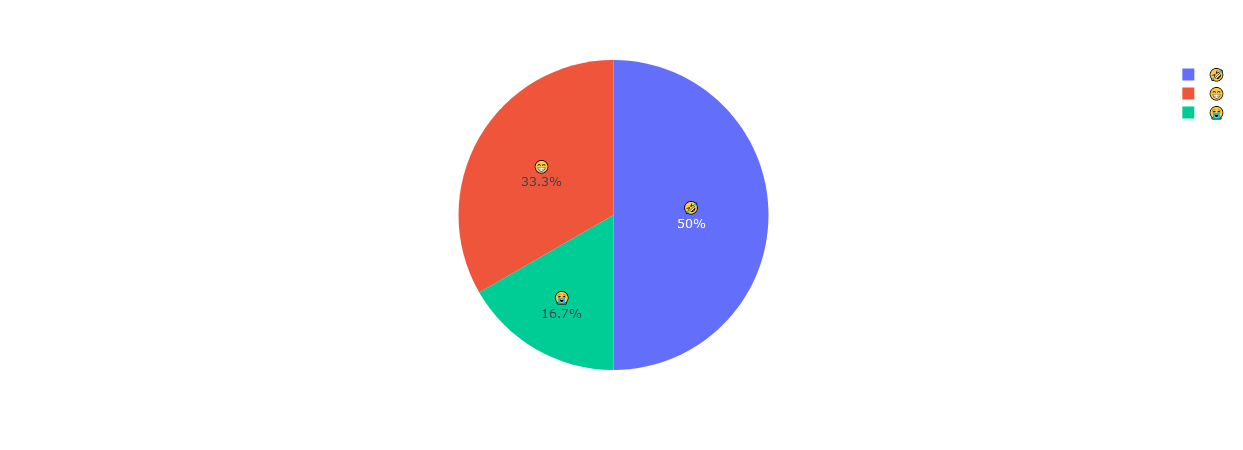

Emoji Distribution for George Che:


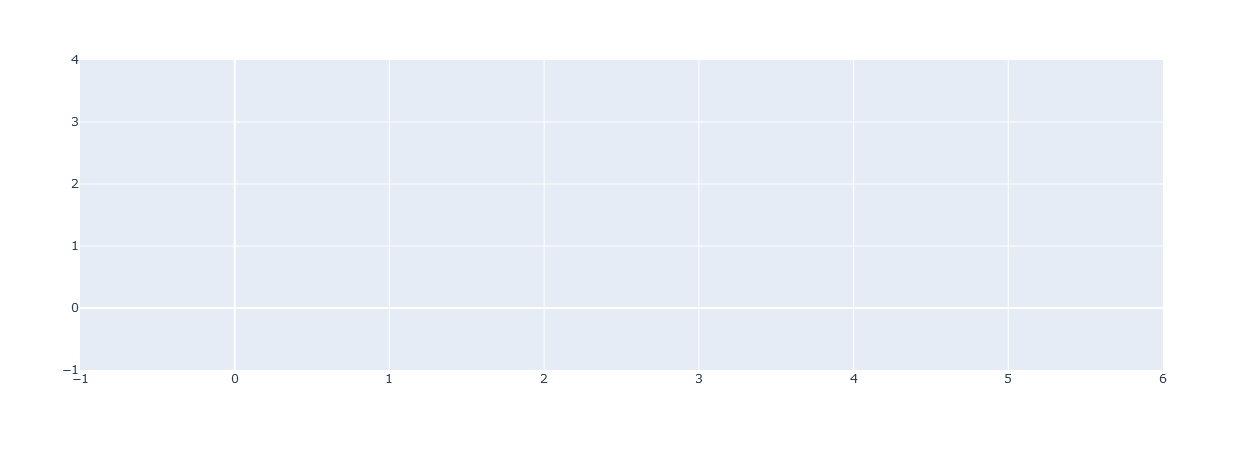

Emoji Distribution for +1 (678) 522-1021


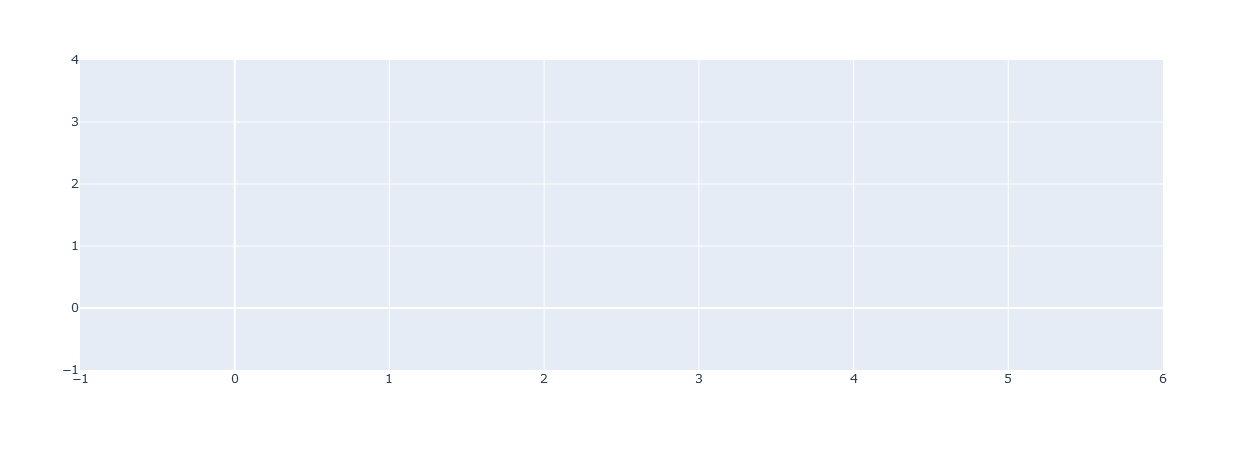

Emoji Distribution for +237 77617465


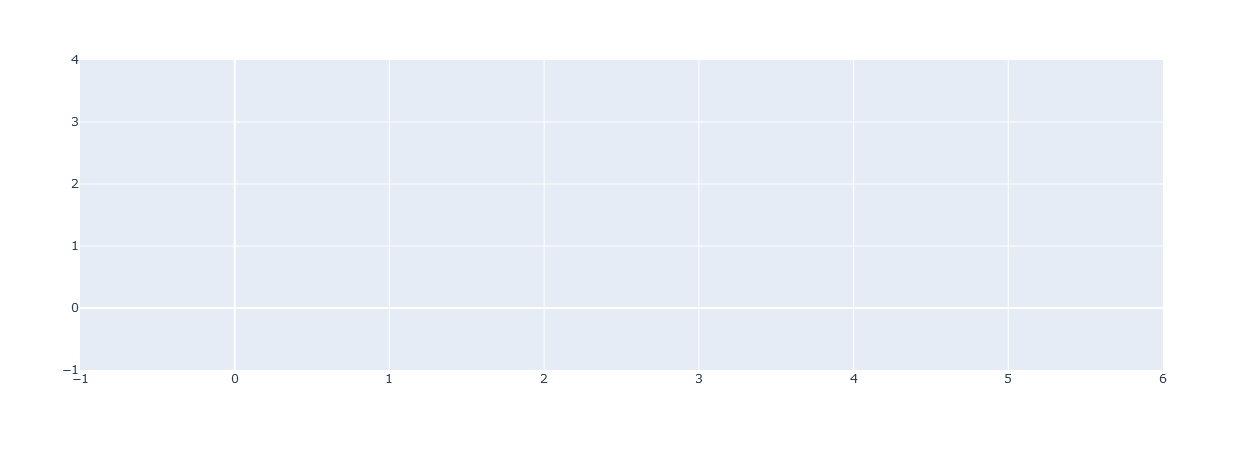

Emoji Distribution for +237 77555556


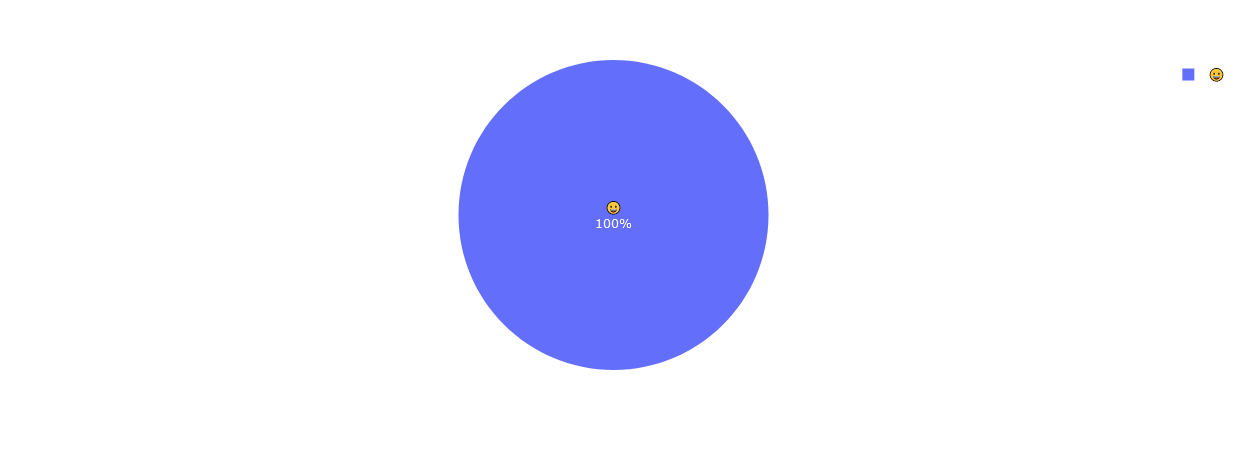

Emoji Distribution for Attoh Mucha


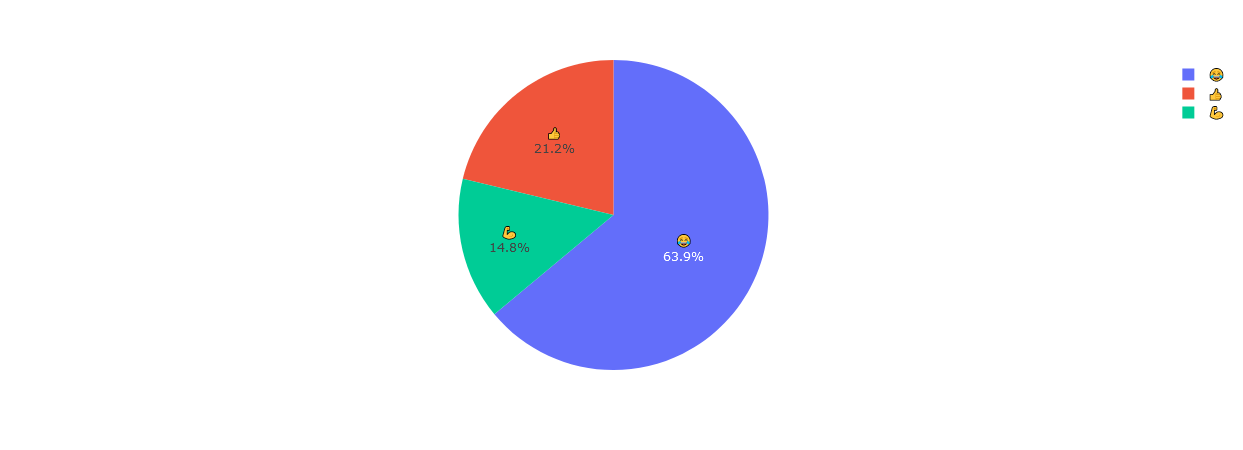

Emoji Distribution for Sabum Michael


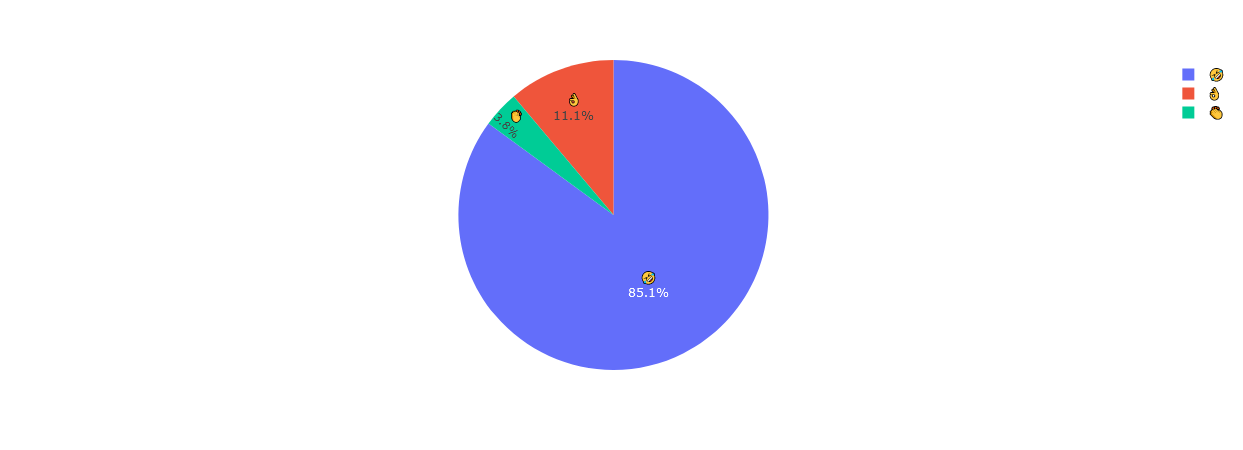

Emoji Distribution for +237 75090119


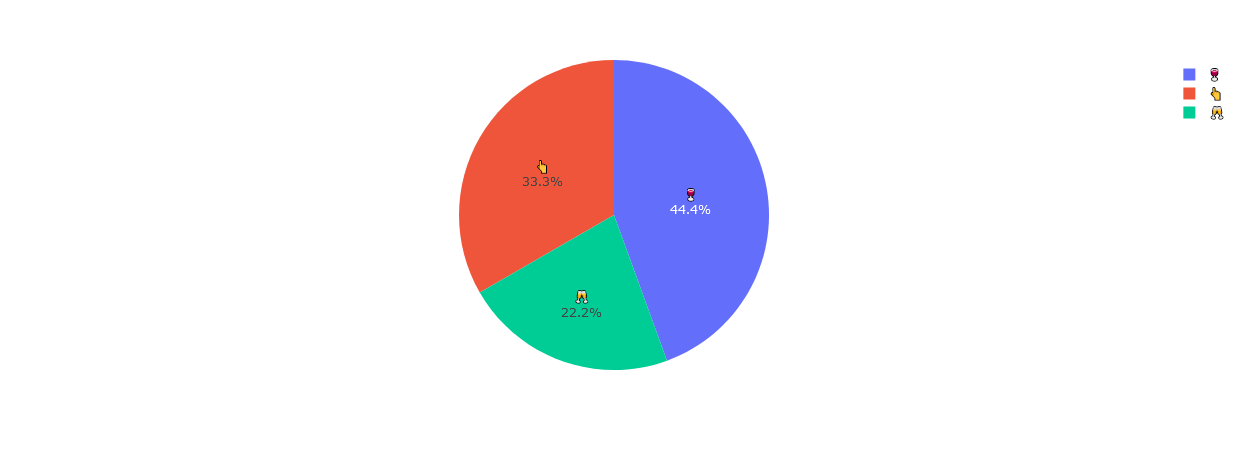

Emoji Distribution for Donatus Nguti


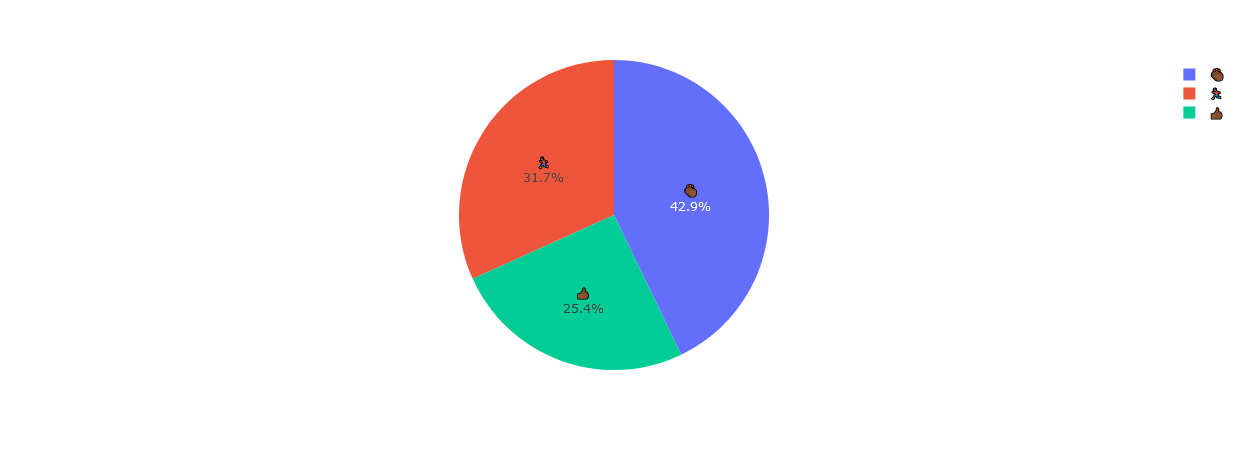

Emoji Distribution for Joe Fotang


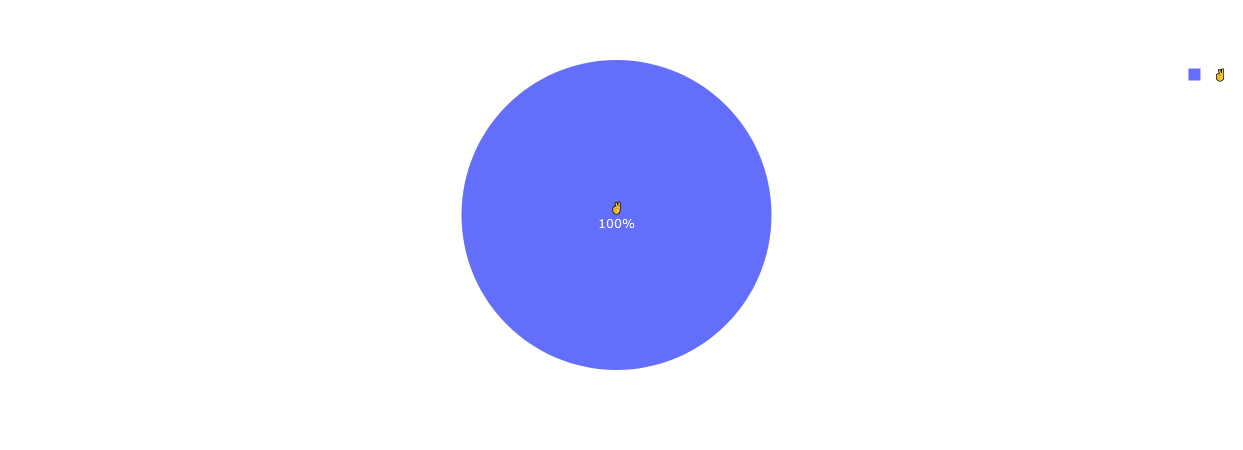

Emoji Distribution for +1 (510) 825-3326


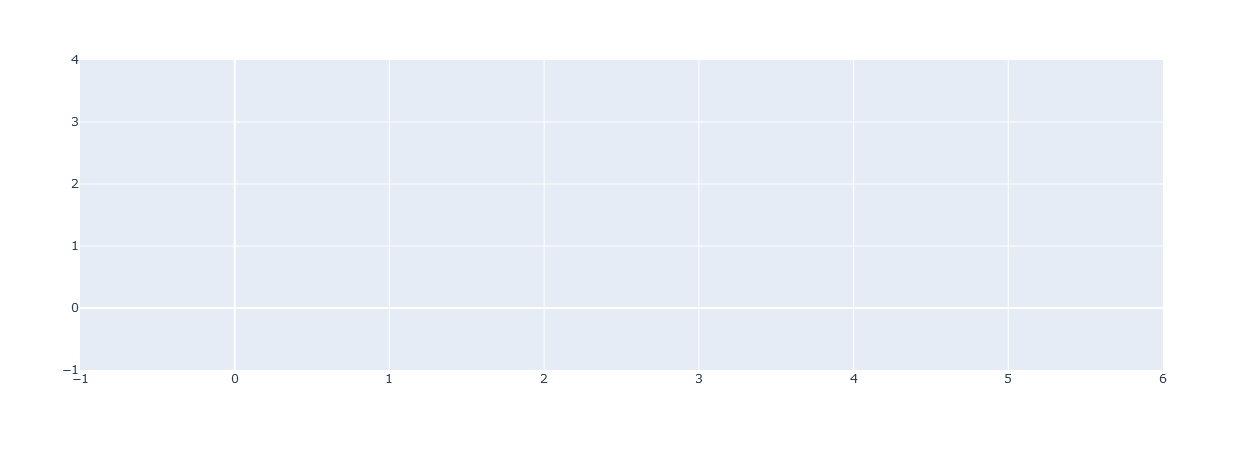

Emoji Distribution for Willy Jideofor


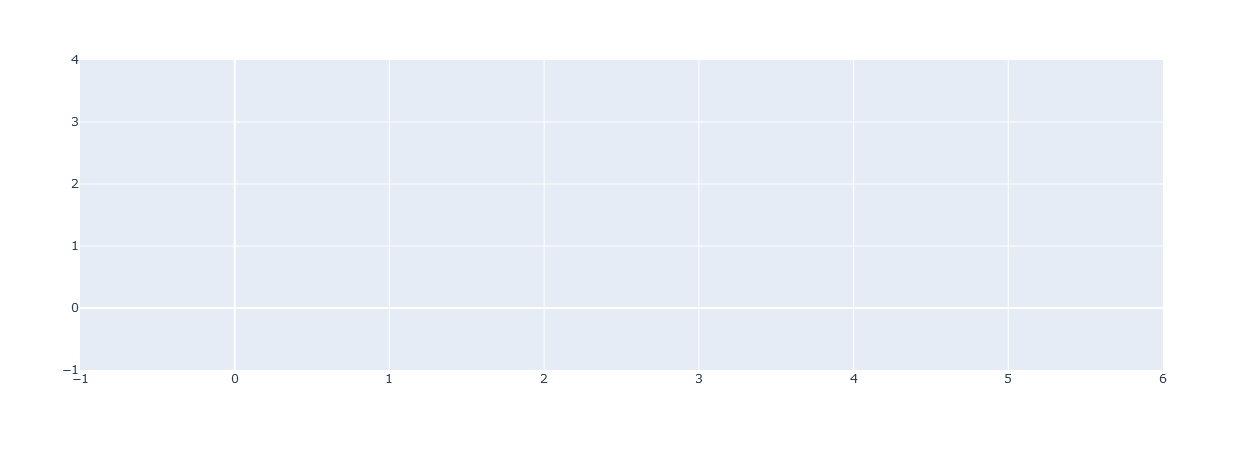

Emoji Distribution for +1 (872) 888-4295


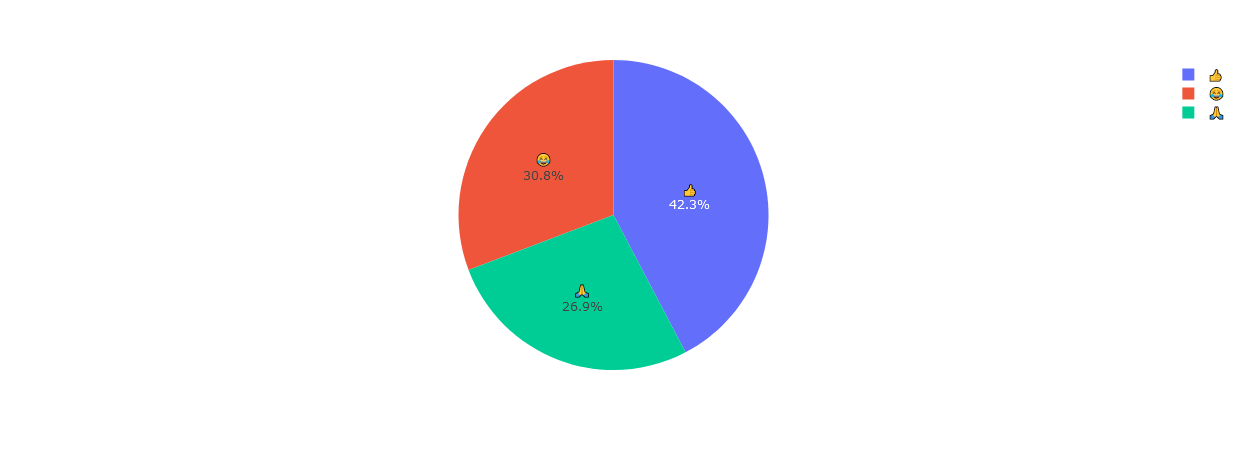

Emoji Distribution for Pedro Jing


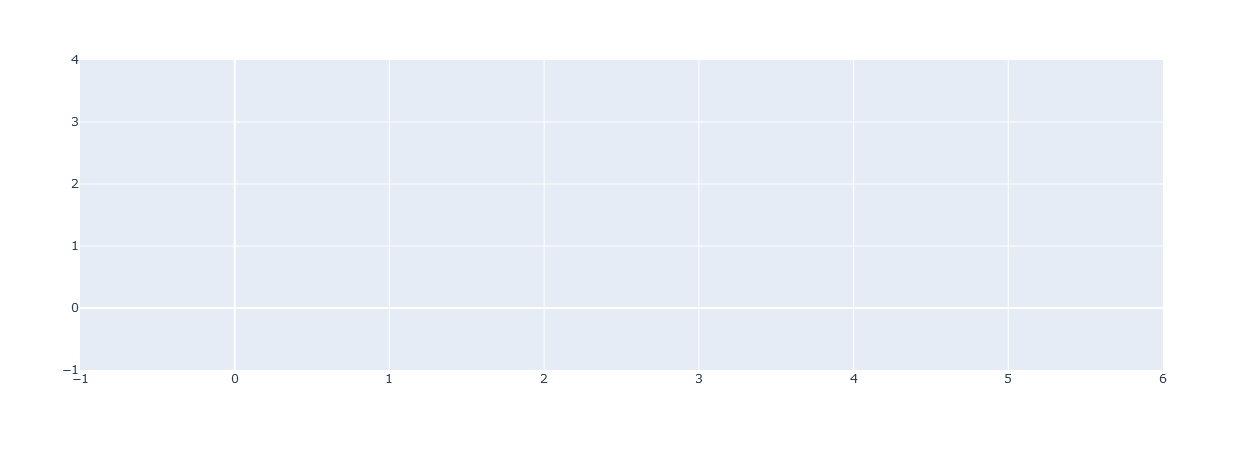

Emoji Distribution for +27 74 575 0811


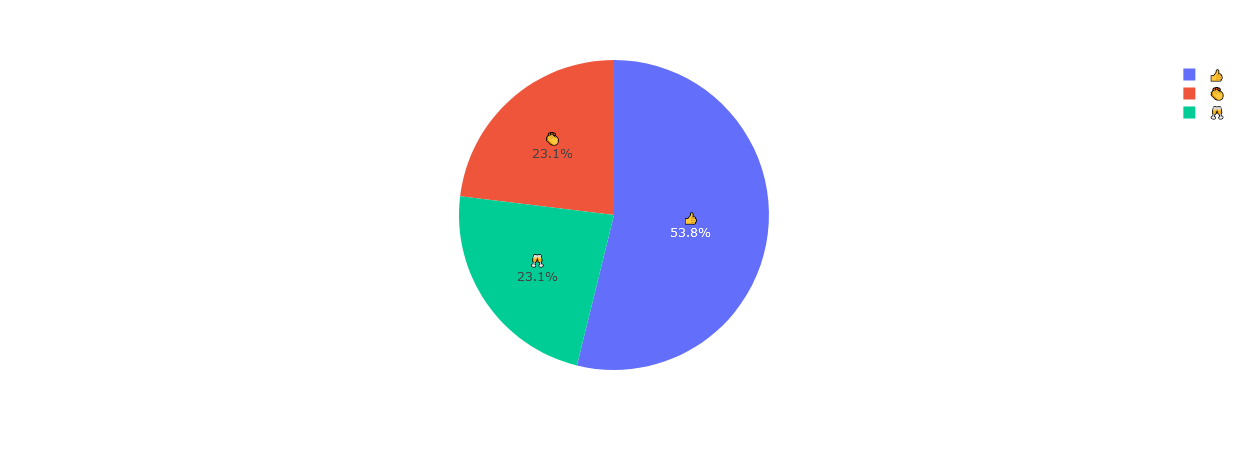

Emoji Distribution for Chi Simon Nche


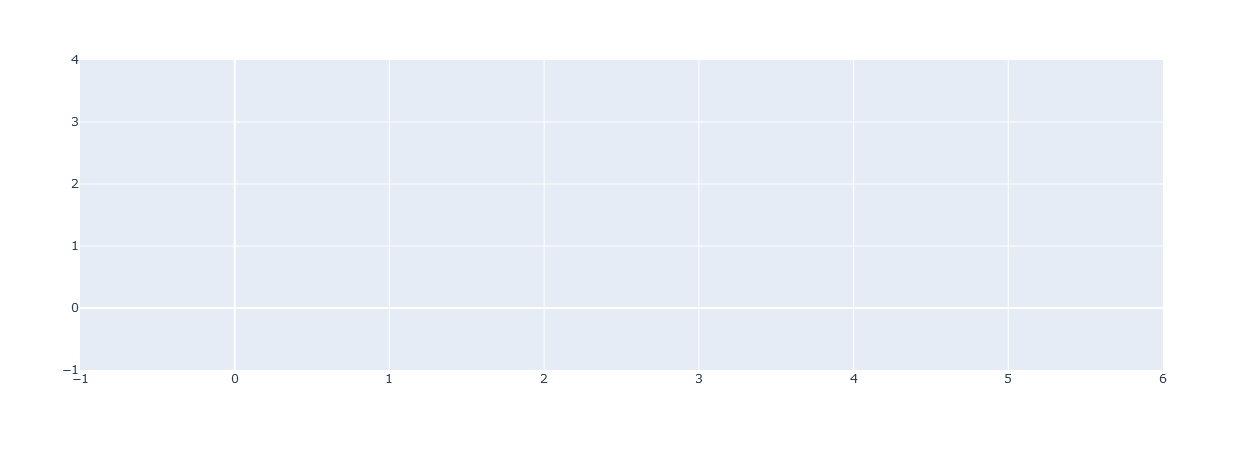

Emoji Distribution for +237 61000729


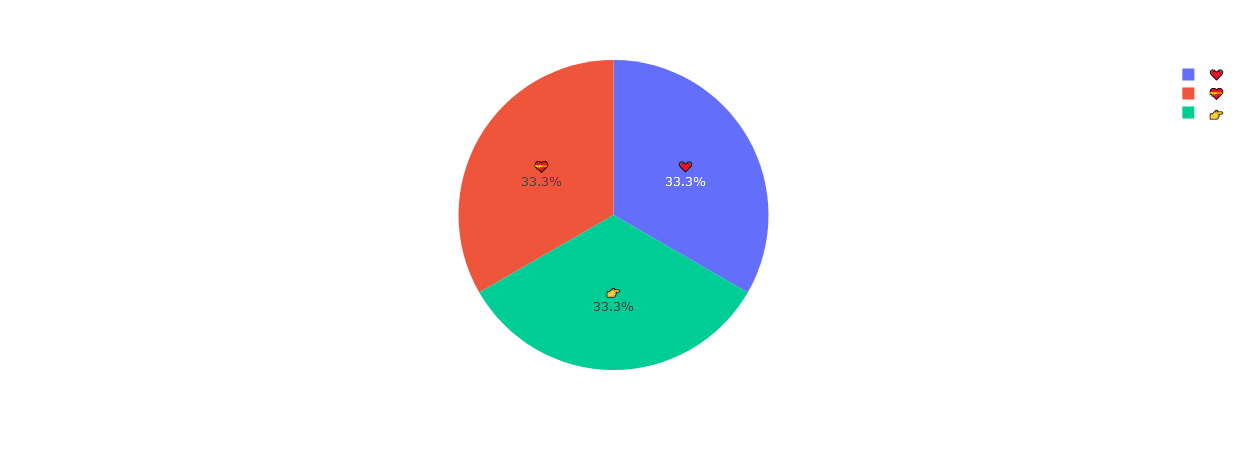

Emoji Distribution for +237 78926736


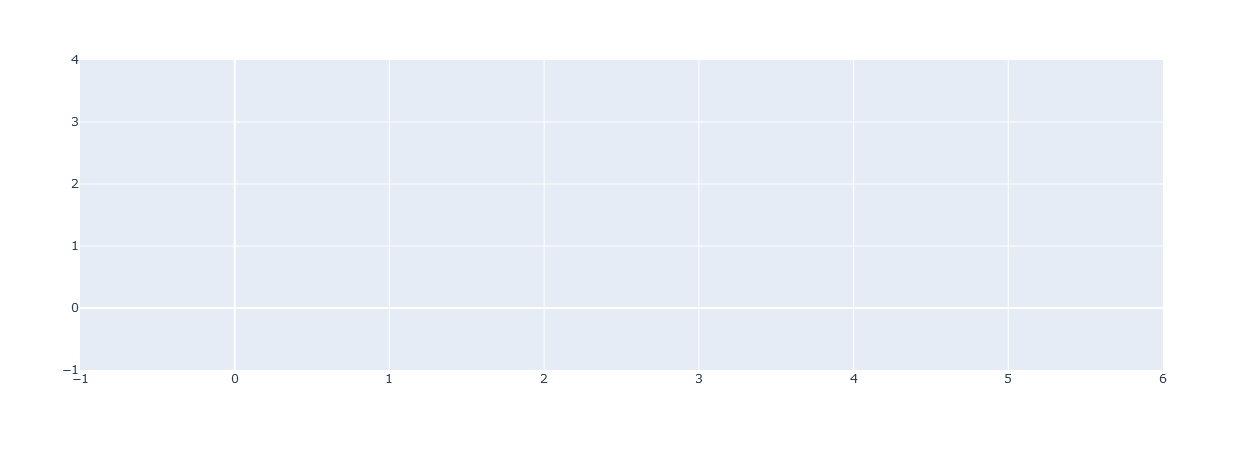

Emoji Distribution for Martin Kwende


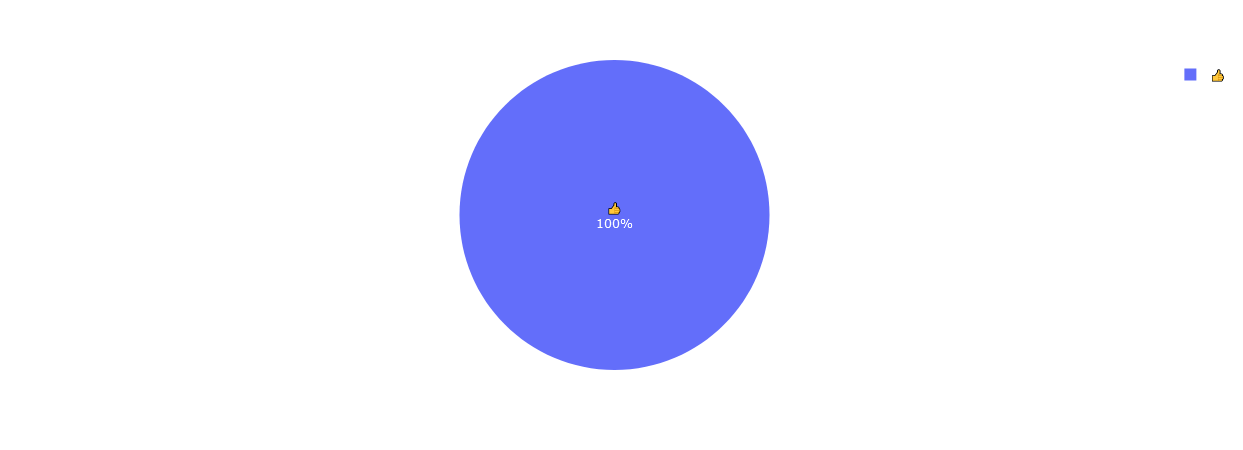

Emoji Distribution for +39 339 335 2050


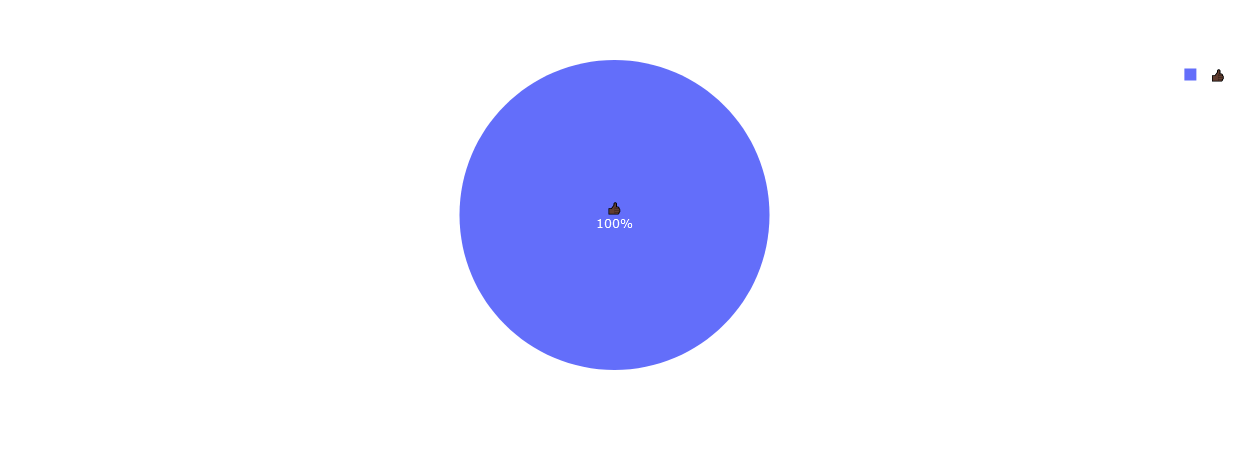

Emoji Distribution for +32 483 73 28 17


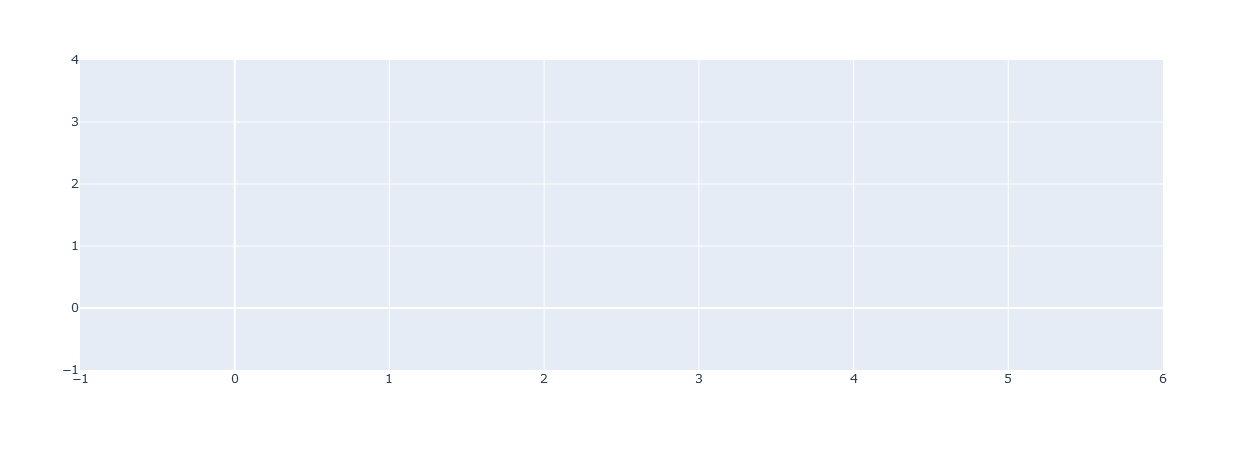

Emoji Distribution for +234 904 047 0212


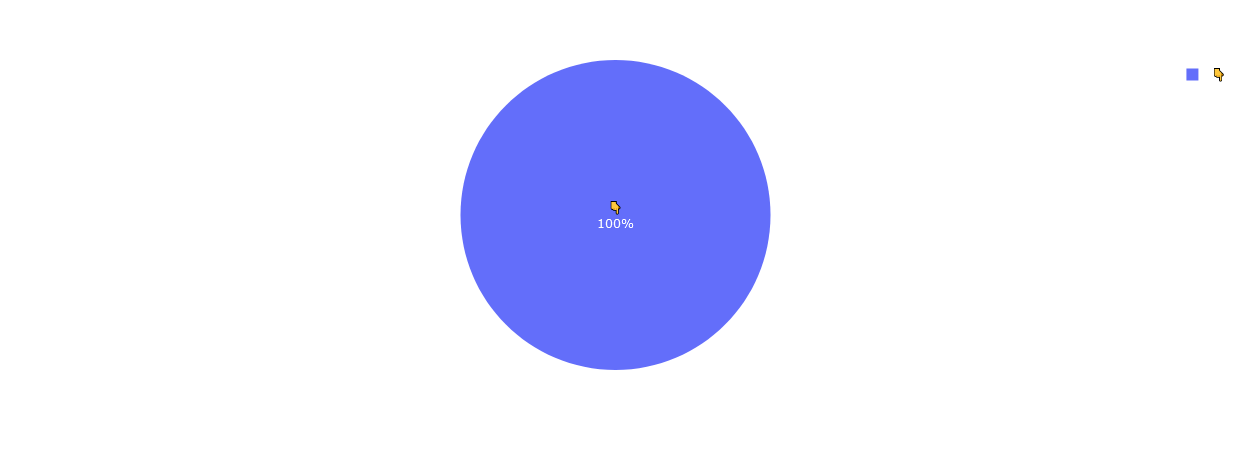

Emoji Distribution for Thomas Tsanga


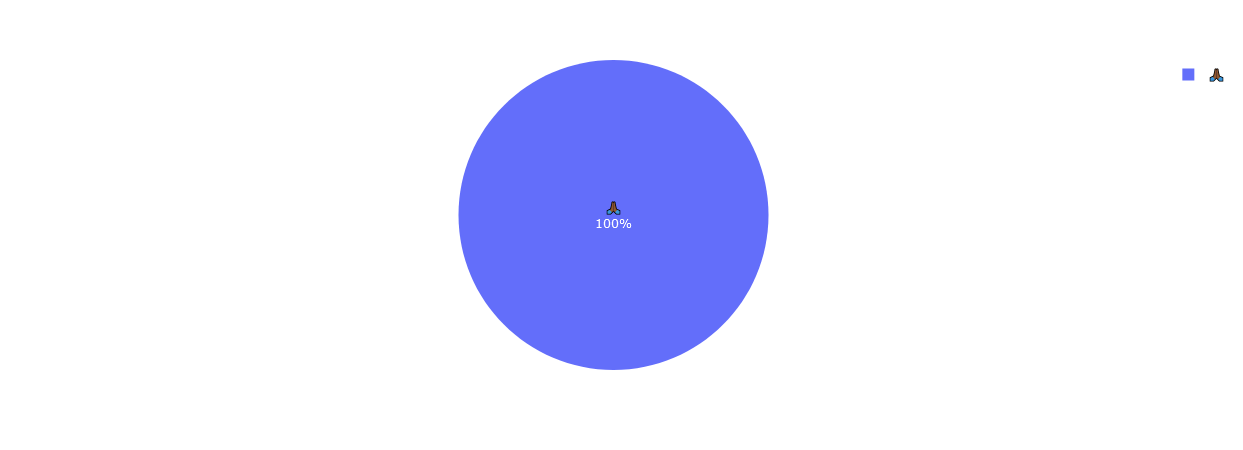

Emoji Distribution for +1 (214) 498-2518


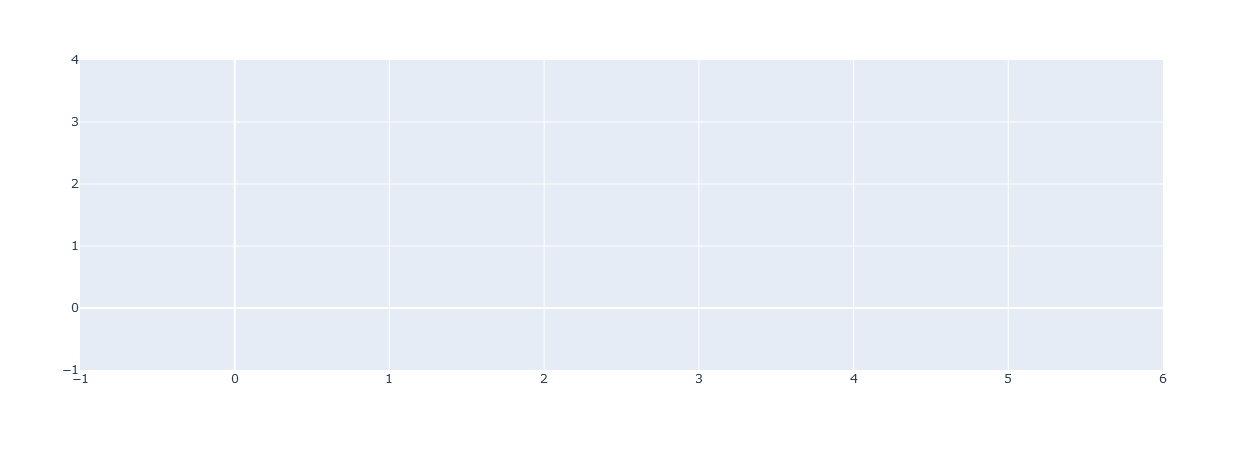

Emoji Distribution for Michael Sendze


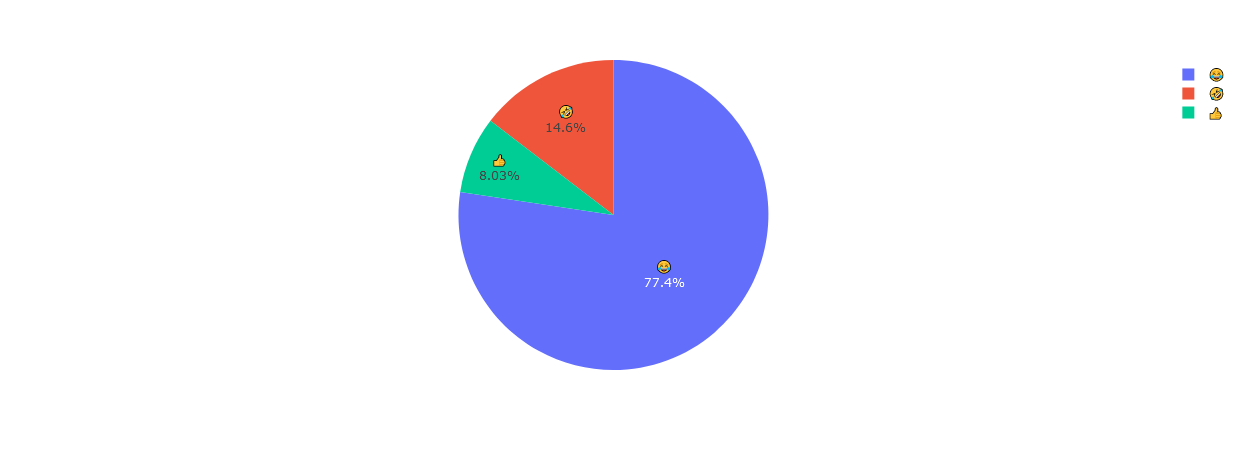

Emoji Distribution for +237 51912301


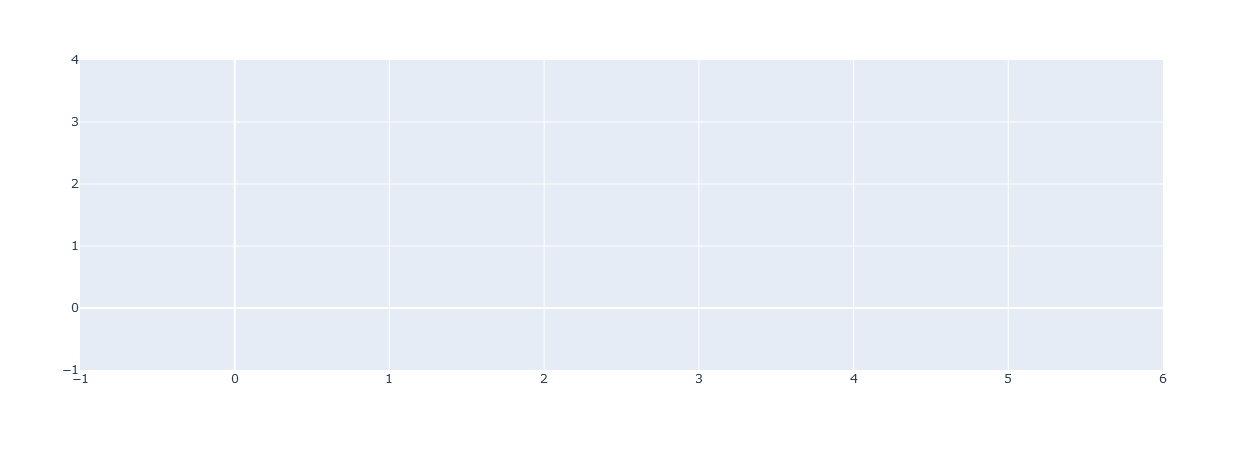

Emoji Distribution for Paul Ayuk


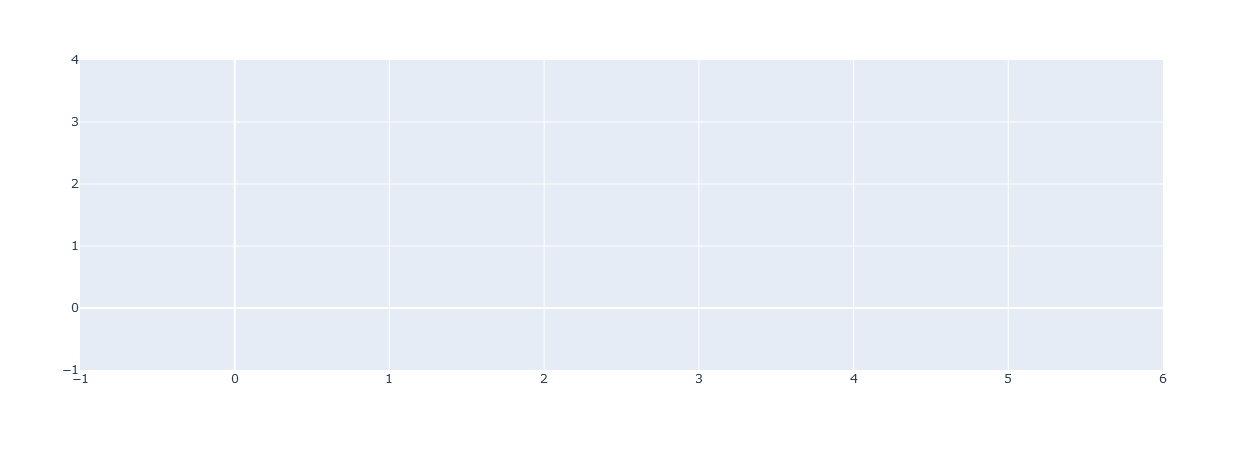

Emoji Distribution for +237 75985445


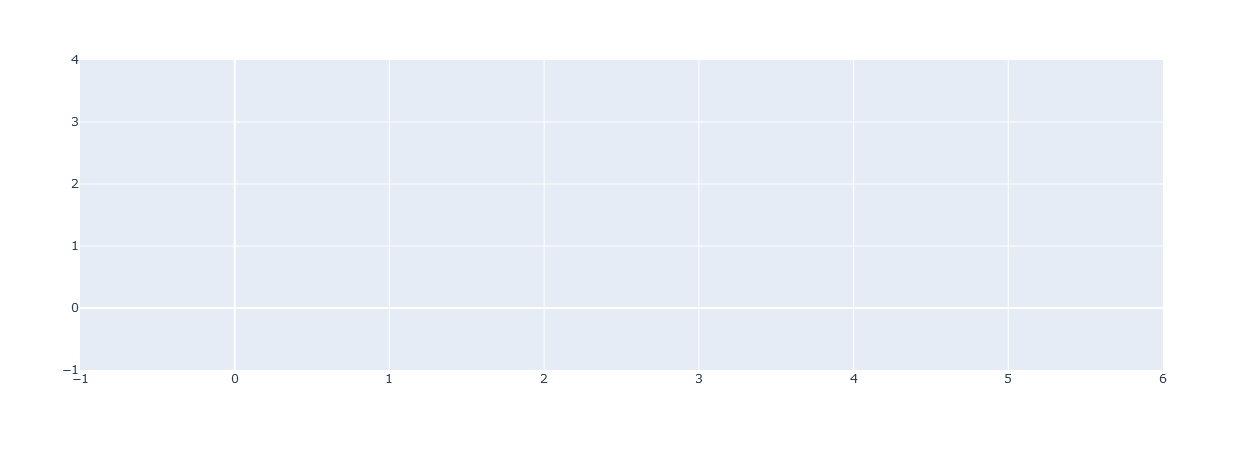

Emoji Distribution for +237 6 73 67 85 72


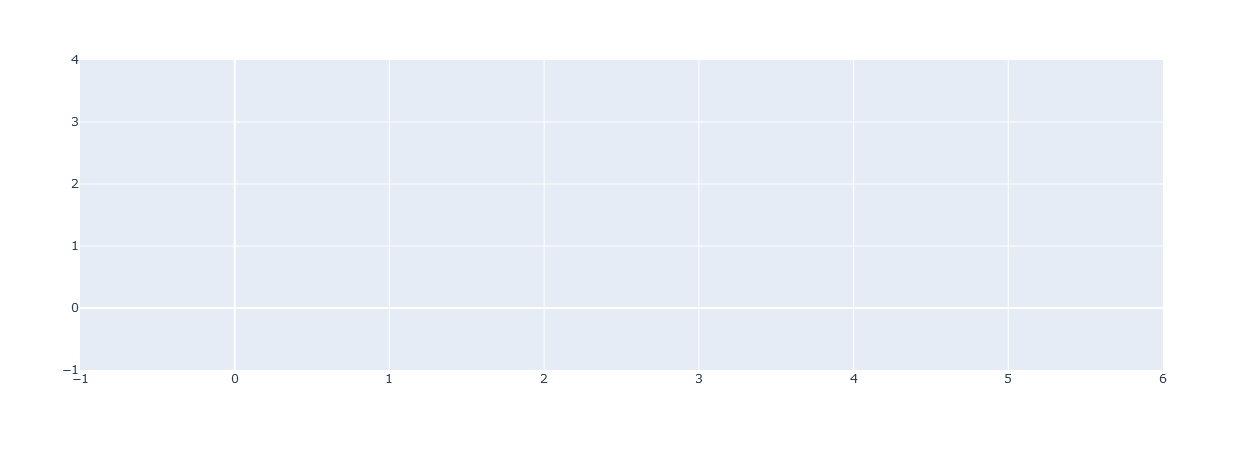

Emoji Distribution for +237 78190000


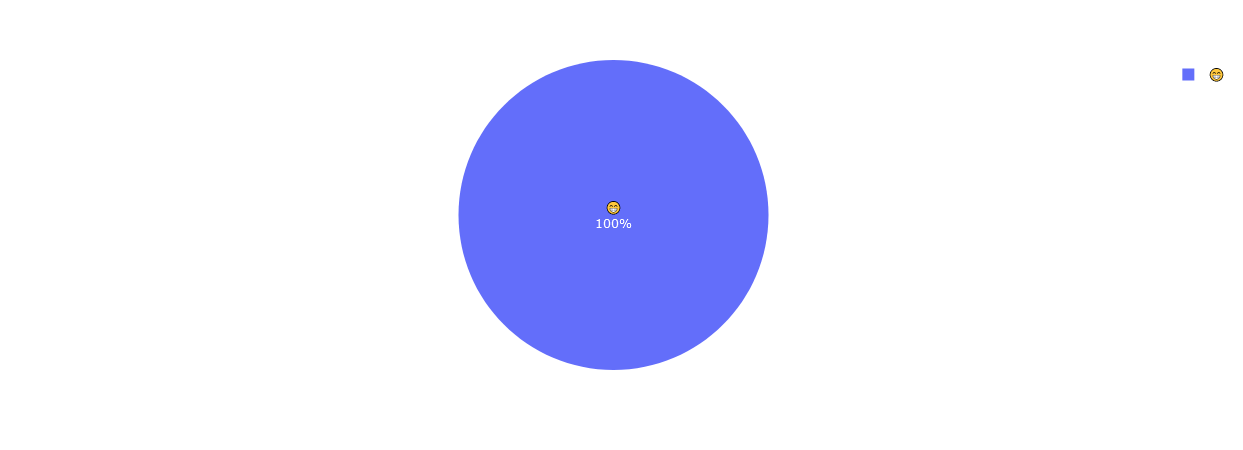

Emoji Distribution for +1 (301) 502-8643


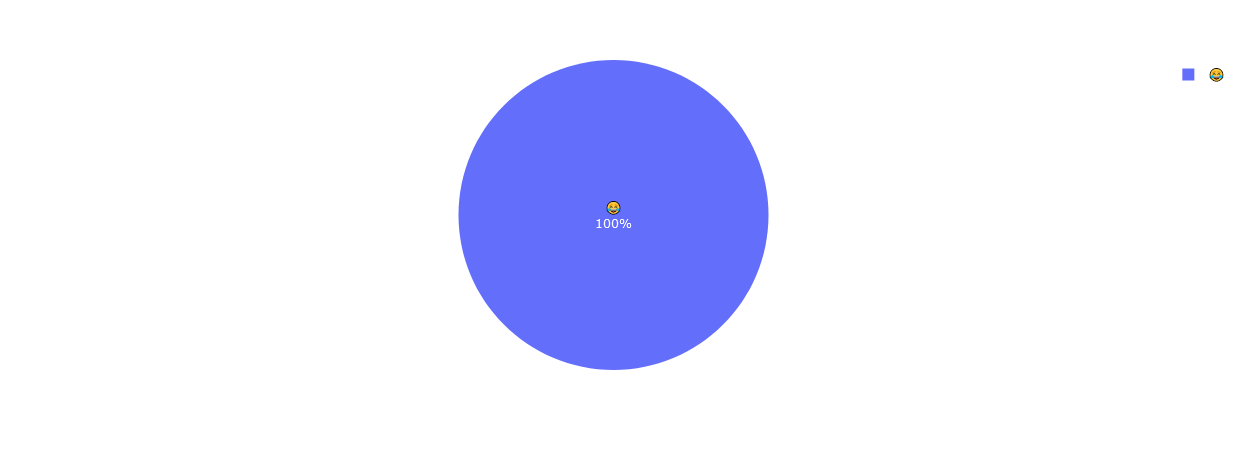

Emoji Distribution for Humphrey Poufong


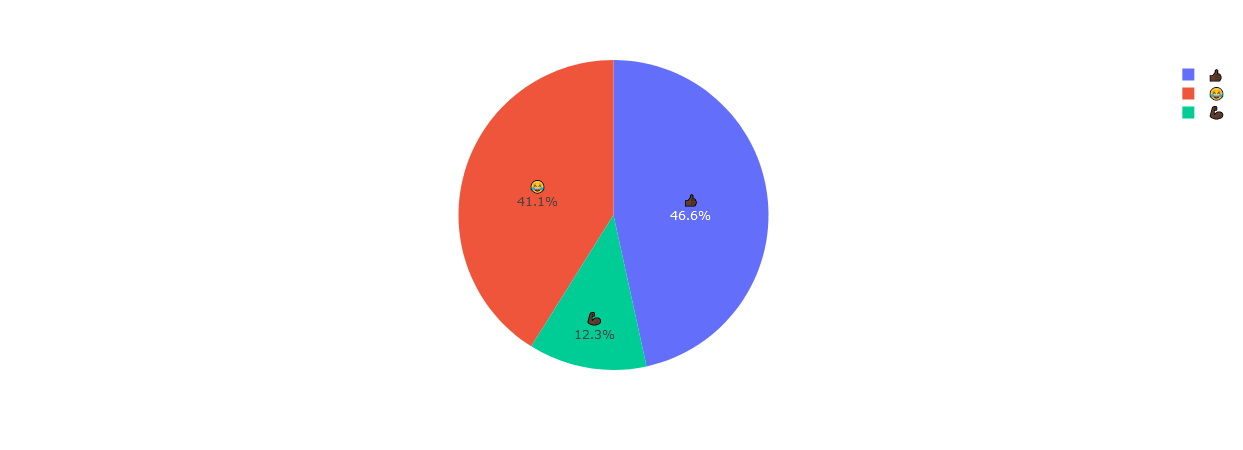

Emoji Distribution for Julius Niba


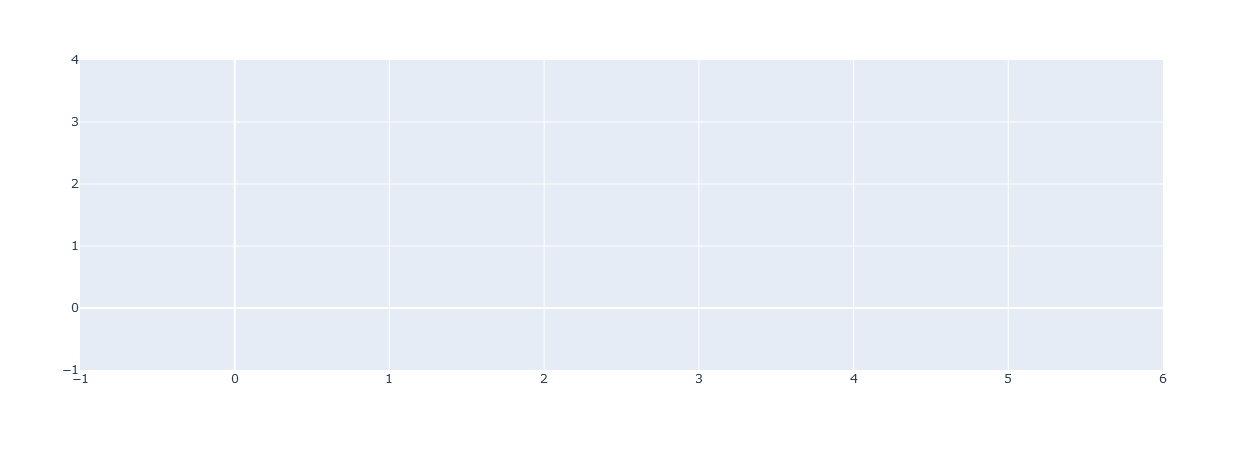

Emoji Distribution for +1 (240) 386-9271


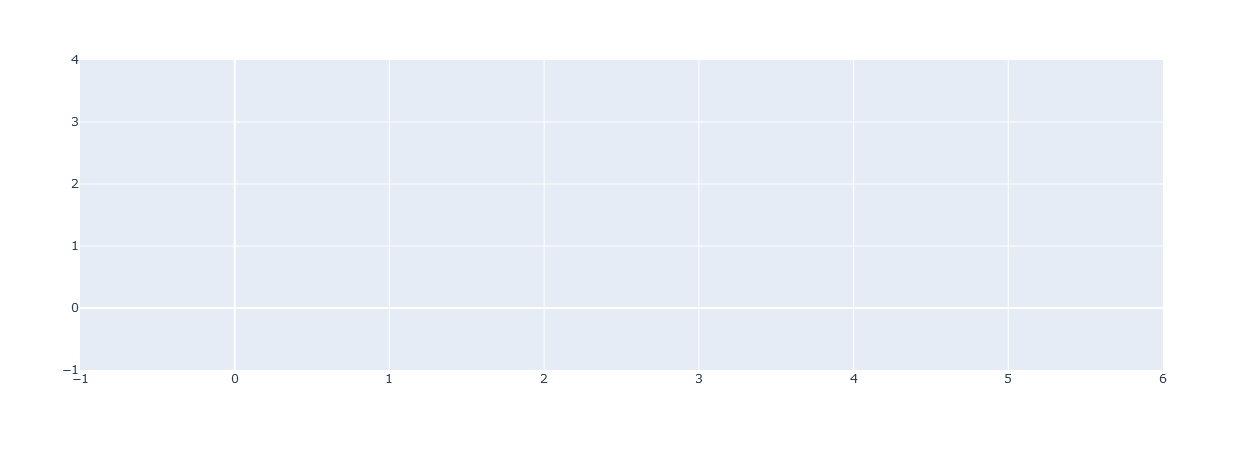

Emoji Distribution for John Akwa


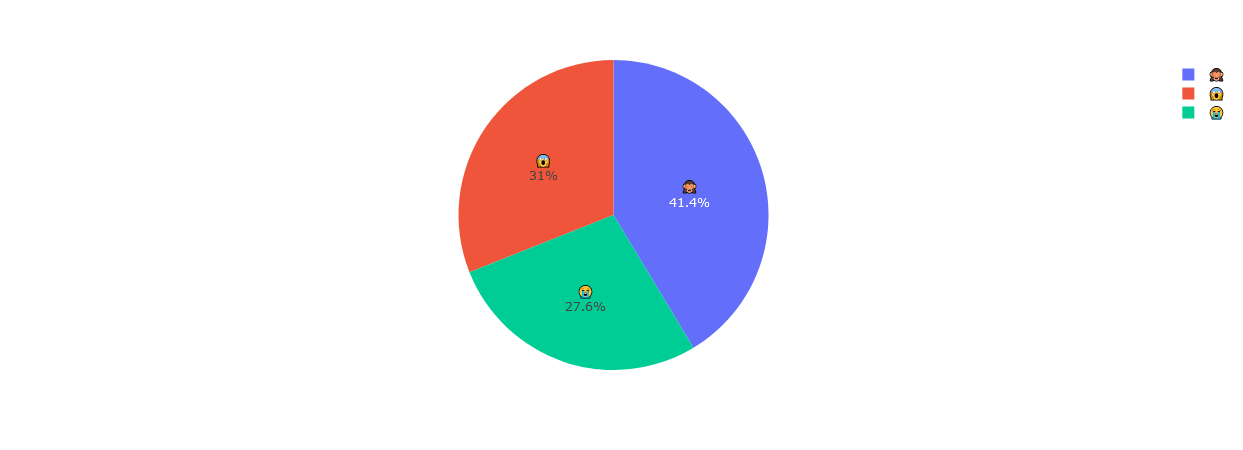

In [39]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df[:3], values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

# Some more Stats

### **Day wise Distribution**

In [40]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

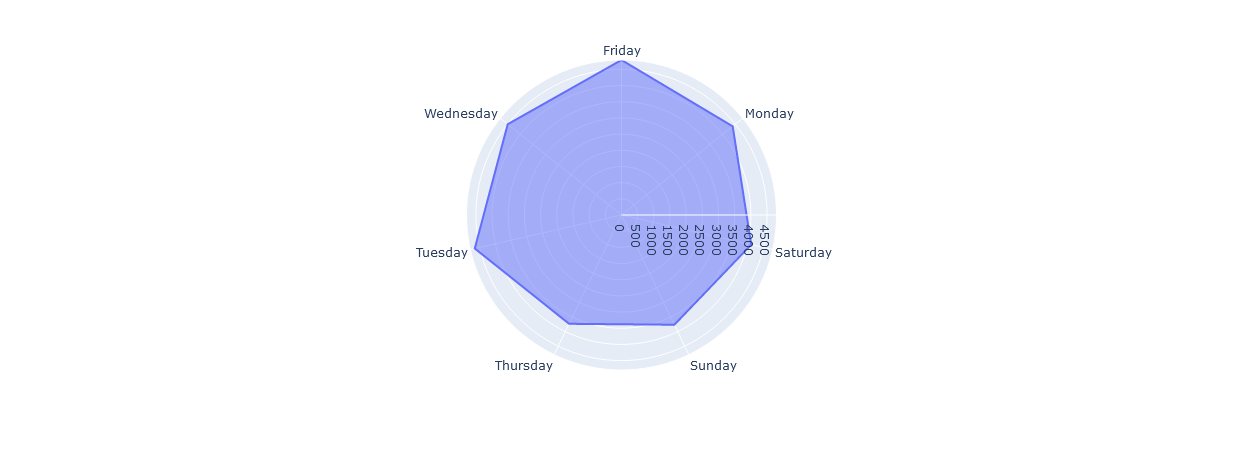

In [41]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

### **Number of messages as times move on**

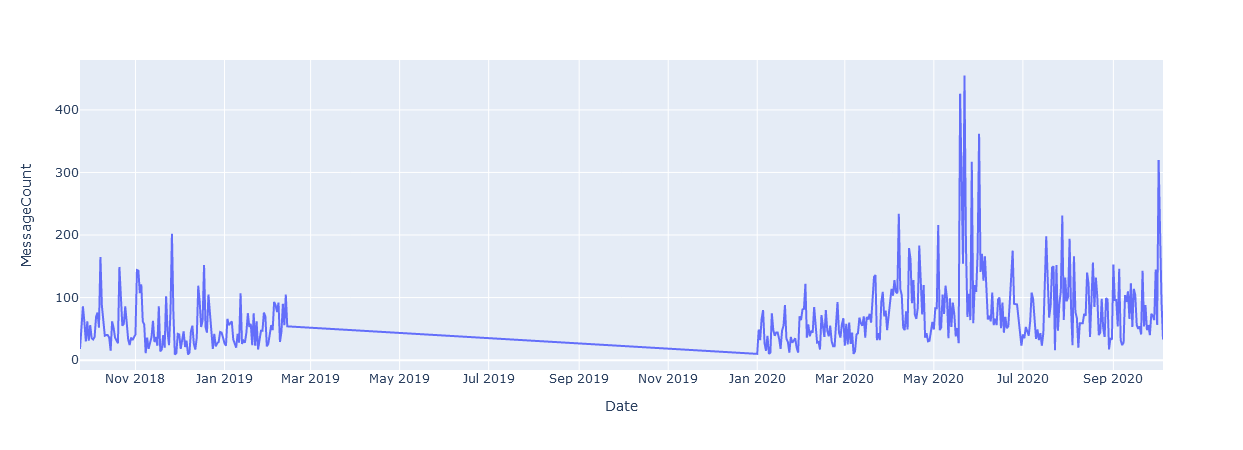

In [42]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

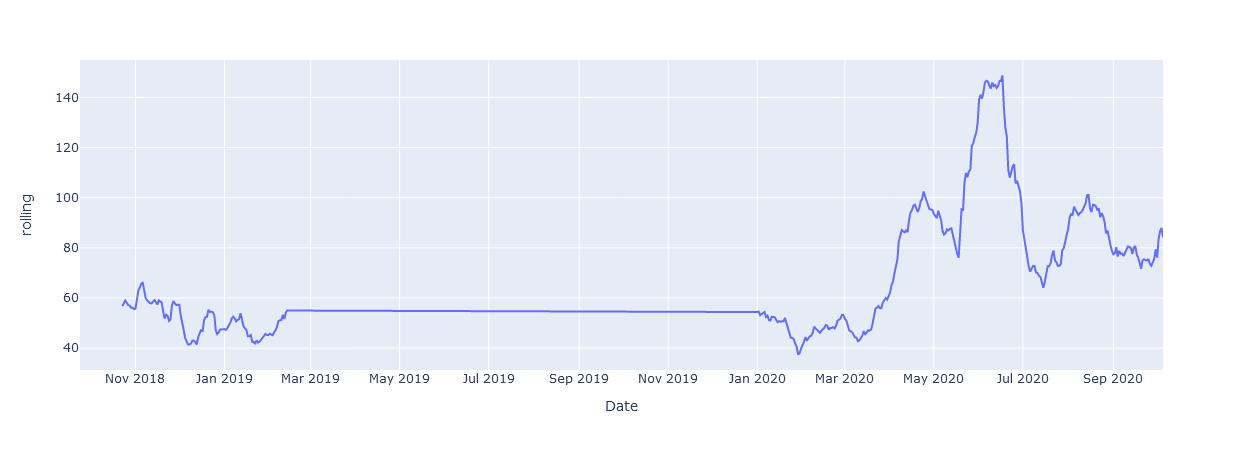

In [43]:
date_df["rolling"] = date_df["MessageCount"].rolling(30).mean()
fig = px.line(date_df, x="Date", y="rolling")
fig.update_xaxes(nticks=20)
fig.show()

### Focusing on 2020 only

In [96]:
import datetime
date_2020_df = messages_df.where(messages_df['Date']> datetime.datetime(2019,12,1)).dropna()
print('Shapes:', messages_df.shape, date_2020_df.shape)

Shapes: (29949, 10) (22445, 10)


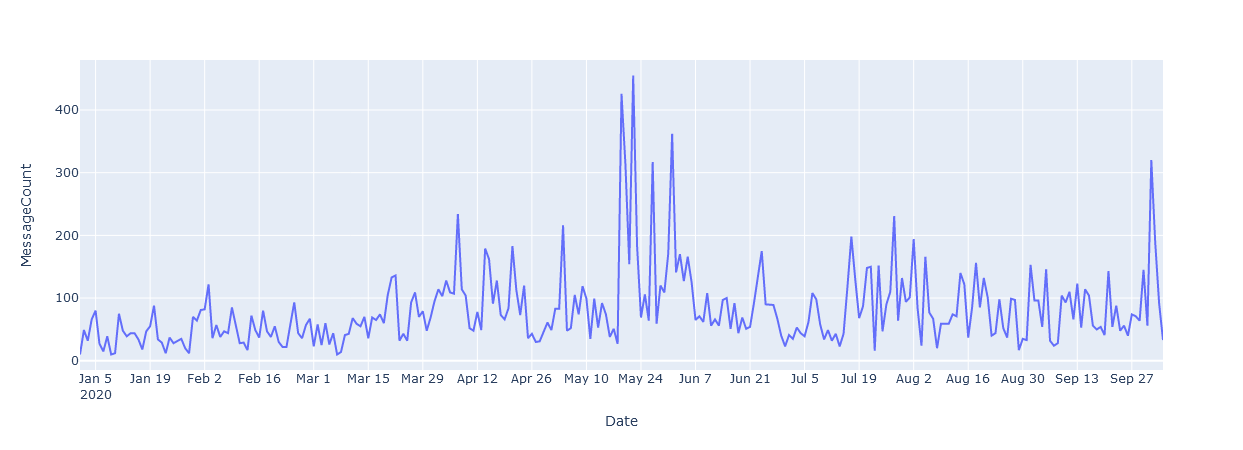

In [98]:
date_2020 = date_2020_df.groupby("Date").sum()
date_2020.reset_index(inplace=True)
fig = px.line(date_2020, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

### **Chatter**

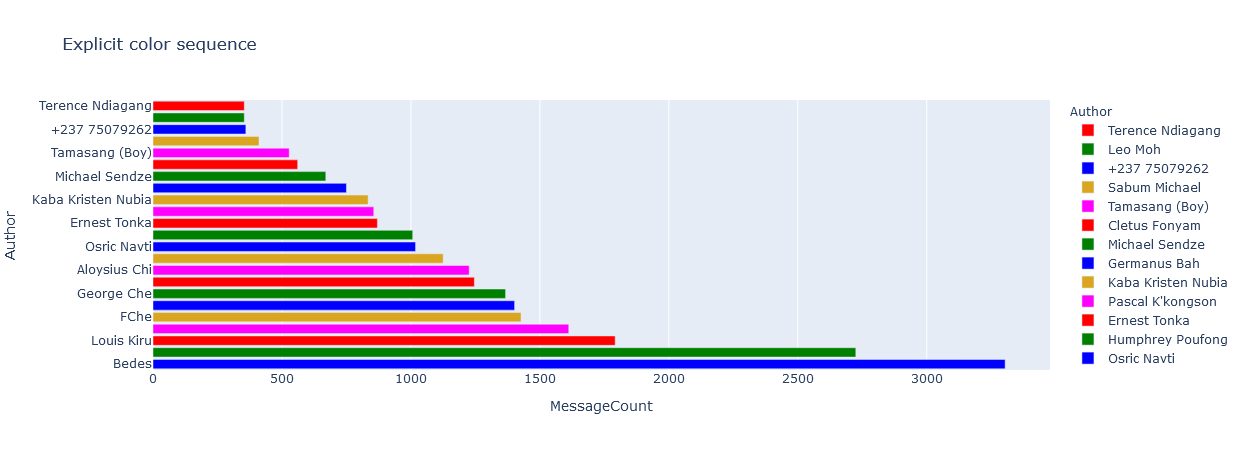

In [97]:
auth = messages_df.groupby("Author").sum().sort_values(by='MessageCount', ascending=True)[70:]
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

### **When are the group members most active?**

Text(0, 0.5, 'Time')

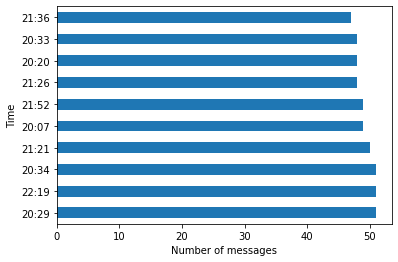

In [52]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

### **The most happening day was -**

2020-05-22    455
2020-05-19    426
2020-06-01    362
2020-10-02    320
2020-05-27    317
             ... 
2020-01-01     10
2020-01-09     10
2020-03-07     10
2018-11-28      9
2018-12-07      9
Name: Date, Length: 422, dtype: int64


Text(0, 0.5, 'Date')

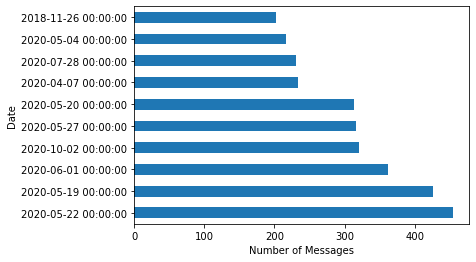

In [53]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

### **The early bird**

### The Late Owl

### **Message Having Maximum number of words**

In [54]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2020-09-14 00:00:00
Time                                                        18:09
Author                                                 George Che
Message         Powerful message from #Deacon Tassang addresse...
emoji                                                          []
urlcount                                                        0
Letter_Count                                                41293
Word_Count                                                   6726
MessageCount                                                    1
emojicount                                                      0
Name: 37472, dtype: object

### **Word Cloud**

In [55]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 6017144 words in all the messages.


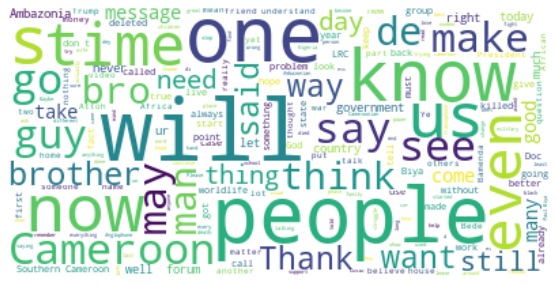

In [65]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni", 'U'])
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### **Author Wise Wordcloud**

Author name Bedes


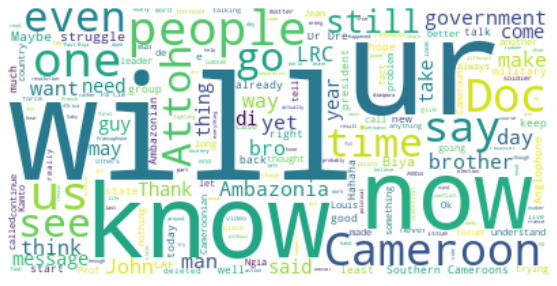

Author name Didier Forbi Melone


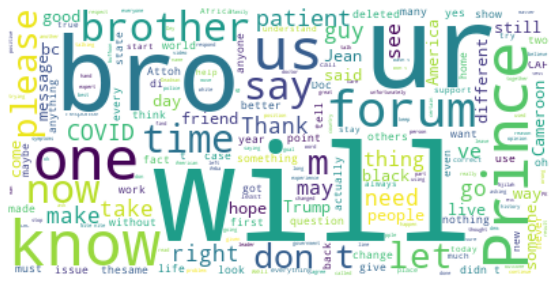

Author name Louis Kiru


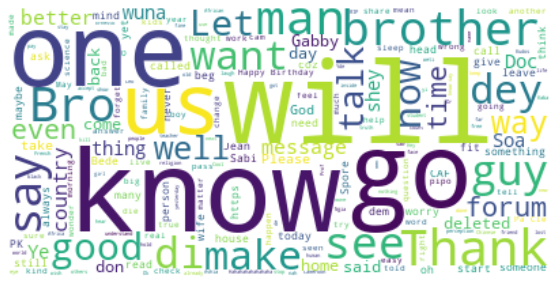

Author name Adrian Wara


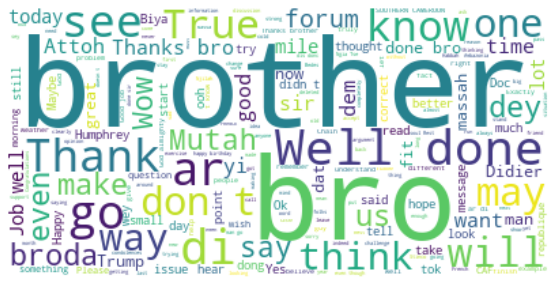

Author name FChe


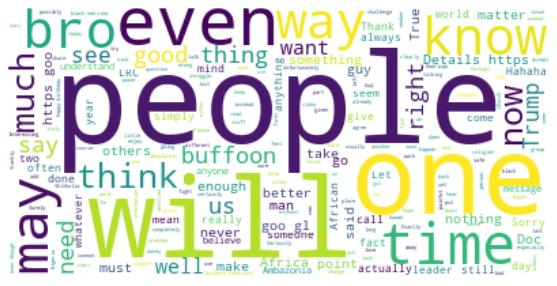

In [144]:
auth = messages_df.groupby("Author").sum().sort_values(by='MessageCount', ascending=False)[:5]
auth.reset_index(inplace=True)
l = auth.Author.unique()
for i in range(len(l)):
   dummy_df = messages_df[messages_df['Author'] == l[i]]
   text = " ".join(review for review in dummy_df.Message)
   stopwords = set(STOPWORDS)
   stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le", 'U', 'S'])
   # Generate a word cloud image
   print('Author name',l[i])
   wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
   # Display the generated image:
   # the matplotlib way:
  
   plt.figure( figsize=(10,5))
   plt.imshow(wordcloud, interpolation='bilinear')
   plt.axis("off")
   plt.show()

In [ ]:
""